# EDA_FORMULA1
Análisis exploratorio de datos de Fórmula 1 centrado en los pilotos españoles y comparaciones clave.


## 📦 Carga de datos

In [70]:
# Cargamos los datos iniciales y las bibliotecas necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
%matplotlib inline
#import os
#os.makedirs("../img/Graficas_generadas/", exist_ok=True)


drivers_df = pd.read_csv('../Datos/Datos_csv/drivers.csv')
races_df = pd.read_csv('../Datos/Datos_csv/races.csv')
qualifying_df = pd.read_csv('../Datos/Datos_csv/qualifying.csv')
races_df = pd.read_csv('../Datos/Datos_csv/races.csv')
results_df = pd.read_csv('../Datos/Datos_csv/results.csv')
constructors_df = pd.read_csv('../Datos/Datos_csv/constructors.csv')
circuits_df = pd.read_csv('../Datos/Datos_csv/circuits.csv')
status_df = pd.read_csv('../Datos/Datos_csv/status.csv')
lap_times_df = pd.read_csv('../Datos/Datos_csv/lap_times.csv')
pit_stops_df = pd.read_csv('../Datos/Datos_csv/pit_stops.csv')
constructor_standings_df = pd.read_csv('../Datos/Datos_csv/constructor_standings.csv')


drivers = drivers_df 
races = races_df
qualifying = qualifying_df 
races = races_df 
results = results_df 
constructors = constructors_df 
circuits = circuits_df 
status = status_df 
lap_times = lap_times_df 
pit_stop = pit_stops_df 
constructor_standings = constructor_standings_df


In [71]:
# Vamos a reconstruir el dataframe que necesitamos incluyendo toda la información relevante
# explicando paso a paso

# Paso 1: drivers - información del piloto
drivers_df = drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality']]

# Paso 2: results - información final de la carrera (posición final, grid, puntos, constructorId)
results_df = results[['driverId', 'raceId', 'constructorId', 'grid', 'position', 'points', 'statusId']]

# Paso 3: qualifying - posición inicial de clasificación
qualifying_df = qualifying[['driverId', 'raceId', 'position']].rename(columns={'position': 'qualifying_position'})

# Paso 4: races - información de la carrera (año, ronda, circuito, nombre, fecha)
races_df = races[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]

# Paso 5: circuits - ubicación y país del circuito
circuits_df = circuits[['circuitId', 'name', 'location', 'country']].rename(columns={'name': 'circuit_name'})

# Paso 6: constructors - nombre y nacionalidad del constructor
constructors_df = constructors[['constructorId', 'name', 'nationality']].rename(columns={'name': 'constructor_name', 'nationality': 'constructor_nationality'})

# Paso 7: Años en los que cada constructor participó
years_constructor = constructor_standings[['constructorId', 'raceId']].merge(races[['raceId', 'year']], on='raceId', how='left')
years_by_constructor = years_constructor.groupby('constructorId')['year'].unique().reset_index().rename(columns={'year': 'years_competed'})

# Paso 8: status - descripción del resultado final
status_df = status[['statusId', 'status']]

# Ahora realizamos los merges progresivos
# Merge de drivers con results (posición final, puntos, etc.)
df_merge = drivers_df.merge(results_df, on='driverId', how='left')

# Merge con qualifying para posición de clasificación (inicial)
df_merge = df_merge.merge(qualifying_df, on=['driverId', 'raceId'], how='left')

# Merge con races para datos de la carrera
df_merge = df_merge.merge(races_df, on='raceId', how='left')

# Merge con circuits para país y localización
df_merge = df_merge.merge(circuits_df, on='circuitId', how='left')

# Merge con constructors para info del constructor
df_merge = df_merge.merge(constructors_df, on='constructorId', how='left')

# Merge con los años en que compitieron los constructores
df_merge = df_merge.merge(years_by_constructor, on='constructorId', how='left')

# Merge con status para descripción del resultado final
df_merge = df_merge.merge(status_df, on='statusId', how='left')

df_merge.info()
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driverId                 26759 non-null  int64  
 1   driverRef                26759 non-null  object 
 2   forename                 26759 non-null  object 
 3   surname                  26759 non-null  object 
 4   nationality              26759 non-null  object 
 5   raceId                   26759 non-null  int64  
 6   constructorId            26759 non-null  int64  
 7   grid                     26759 non-null  int64  
 8   position                 26759 non-null  object 
 9   points                   26759 non-null  float64
 10  statusId                 26759 non-null  int64  
 11  qualifying_position      10494 non-null  float64
 12  year                     26759 non-null  int64  
 13  round                    26759 non-null  int64  
 14  circuitId             

,driverId,driverRef,forename,surname,nationality,raceId,constructorId,grid,position,points,...,circuitId,name,date,circuit_name,location,country,constructor_name,constructor_nationality,years_competed,status
0,1,hamilton,Lewis,Hamilton,British,18,1,1,1,10.0,...,1,Australian Grand Prix,2008-03-16,Albert Park Grand Prix Circuit,Melbourne,Australia,McLaren,British,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
1,1,hamilton,Lewis,Hamilton,British,19,1,9,5,4.0,...,2,Malaysian Grand Prix,2008-03-23,Sepang International Circuit,Kuala Lumpur,Malaysia,McLaren,British,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
2,1,hamilton,Lewis,Hamilton,British,20,1,3,13,0.0,...,3,Bahrain Grand Prix,2008-04-06,Bahrain International Circuit,Sakhir,Bahrain,McLaren,British,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",+1 Lap
3,1,hamilton,Lewis,Hamilton,British,21,1,5,3,6.0,...,4,Spanish Grand Prix,2008-04-27,Circuit de Barcelona-Catalunya,Montmeló,Spain,McLaren,British,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
4,1,hamilton,Lewis,Hamilton,British,22,1,3,2,8.0,...,5,Turkish Grand Prix,2008-05-11,Istanbul Park,Istanbul,Turkey,McLaren,British,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished


## 🏆 Hipótesis 1: Alonso es el mejor piloto español

Para ello limpiaremos los .csv de los que disponemos. 

In [72]:
# Filtramos el dataframe para incluir solo a los pilotos de nacionalidad española
df_espanoles = df_merge[df_merge['nationality'] == 'Spanish']

# Guardamos este dataframe como un CSV
df_espanoles.to_csv('../Datos/Datos_csv_creados/_pilotos_espanoles_f1.csv', index=False)

df_espanoles.info()



<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 746 to 25276
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driverId                 913 non-null    int64  
 1   driverRef                913 non-null    object 
 2   forename                 913 non-null    object 
 3   surname                  913 non-null    object 
 4   nationality              913 non-null    object 
 5   raceId                   913 non-null    int64  
 6   constructorId            913 non-null    int64  
 7   grid                     913 non-null    int64  
 8   position                 913 non-null    object 
 9   points                   913 non-null    float64
 10  statusId                 913 non-null    int64  
 11  qualifying_position      717 non-null    float64
 12  year                     913 non-null    int64  
 13  round                    913 non-null    int64  
 14  circuitId                91

In [73]:
# Contamos el número de carreras por piloto
carreras_por_piloto = df_espanoles.groupby('driverId').size().reset_index(name='num_carreras')

# Filtramos los pilotos que hayan corrido más de 5 carreras
pilotos_mas_5_carreras = carreras_por_piloto[carreras_por_piloto['num_carreras'] > 5]['driverId']

# Filtramos el dataframe para incluir solo esos pilotos
df_espanoles_mas_5_carreras = df_espanoles[df_espanoles['driverId'].isin(pilotos_mas_5_carreras)]

df_espanoles_mas_5_carreras


,driverId,driverRef,forename,surname,nationality,raceId,constructorId,grid,position,points,...,circuitId,name,date,circuit_name,location,country,constructor_name,constructor_nationality,years_competed,status
746,4,alonso,Fernando,Alonso,Spanish,18,4,11,4,5.0,...,1,Australian Grand Prix,2008-03-16,Albert Park Grand Prix Circuit,Melbourne,Australia,Renault,French,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
747,4,alonso,Fernando,Alonso,Spanish,19,4,7,8,1.0,...,2,Malaysian Grand Prix,2008-03-23,Sepang International Circuit,Kuala Lumpur,Malaysia,Renault,French,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
748,4,alonso,Fernando,Alonso,Spanish,20,4,10,10,0.0,...,3,Bahrain Grand Prix,2008-04-06,Bahrain International Circuit,Sakhir,Bahrain,Renault,French,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
749,4,alonso,Fernando,Alonso,Spanish,21,4,2,\N,0.0,...,4,Spanish Grand Prix,2008-04-27,Circuit de Barcelona-Catalunya,Montmeló,Spain,Renault,French,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Engine
750,4,alonso,Fernando,Alonso,Spanish,22,4,7,6,3.0,...,5,Turkish Grand Prix,2008-05-11,Istanbul Park,Istanbul,Turkey,Renault,French,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 200...",Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25272,833,merhi,Roberto,Merhi,Spanish,936,209,19,15,0.0,...,11,Hungarian Grand Prix,2015-07-26,Hungaroring,Budapest,Hungary,Manor Marussia,British,"[2015, 2016]",+2 Laps
25273,833,merhi,Roberto,Merhi,Spanish,937,209,17,15,0.0,...,13,Belgian Grand Prix,2015-08-23,Circuit de Spa-Francorchamps,Spa,Belgium,Manor Marussia,British,"[2015, 2016]",+1 Lap
25274,833,merhi,Roberto,Merhi,Spanish,938,209,14,16,0.0,...,14,Italian Grand Prix,2015-09-06,Autodromo Nazionale di Monza,Monza,Italy,Manor Marussia,British,"[2015, 2016]",+2 Laps
25275,833,merhi,Roberto,Merhi,Spanish,941,209,18,13,0.0,...,71,Russian Grand Prix,2015-10-11,Sochi Autodrom,Sochi,Russia,Manor Marussia,British,"[2015, 2016]",+1 Lap


In [74]:
# Contamos el número de carreras por piloto
num_carreras = df_espanoles_mas_5_carreras.groupby(['driverId', 'forename', 'surname']).size().reset_index(name='num_carreras')

# Puntos totales por piloto
total_puntos = df_espanoles_mas_5_carreras.groupby(['driverId', 'forename', 'surname'])['points'].sum().reset_index(name='total_puntos')

# Número de victorias (posición final = 1)
victorias = df_espanoles_mas_5_carreras[df_espanoles_mas_5_carreras['position'] == 1].groupby(['driverId', 'forename', 'surname']).size().reset_index(name='num_victorias')

# Años en los que compitieron
years_participacion = df_espanoles_mas_5_carreras.groupby(['driverId', 'forename', 'surname'])['year'].unique().reset_index()
years_participacion['num_years'] = years_participacion['year'].apply(lambda x: len(x))

# Constructores únicos por piloto
constructores_por_piloto = df_espanoles_mas_5_carreras.groupby(['driverId', 'forename', 'surname'])['constructor_name'].unique().reset_index()
constructores_por_piloto['constructors'] = constructores_por_piloto['constructor_name'].apply(lambda x: ', '.join(x))

# Combinamos toda la información
df_stats_espanoles = num_carreras.merge(total_puntos, on=['driverId', 'forename', 'surname'], how='left')
df_stats_espanoles = df_stats_espanoles.merge(victorias, on=['driverId', 'forename', 'surname'], how='left')
df_stats_espanoles = df_stats_espanoles.merge(years_participacion[['driverId', 'year', 'num_years']], on='driverId', how='left')
df_stats_espanoles = df_stats_espanoles.merge(constructores_por_piloto[['driverId', 'constructors']], on='driverId', how='left')

# Rellenamos NaN de victorias con 0
df_stats_espanoles['num_victorias'] = df_stats_espanoles['num_victorias'].fillna(0).astype(int)
# Renombramos columna para mayor claridad
df_stats_espanoles = df_stats_espanoles.rename(columns={'year': 'years_participated'})
df_stats_espanoles
df_stats_espanoles = df_stats_espanoles.sort_values(by='total_puntos', ascending=False)
df_stats_espanoles

,driverId,forename,surname,num_carreras,total_puntos,num_victorias,years_participated,num_years,constructors
0,4,Fernando,Alonso,404,2329.0,0,"[2008, 2007, 2006, 2005, 2004, 2003, 2001, 200...",21,"Renault, McLaren, Minardi, Ferrari, Alpine F1 ..."
10,832,Carlos,Sainz,208,1203.5,0,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...",10,"Toro Rosso, Renault, McLaren, Ferrari"
1,37,Pedro,de la Rosa,107,35.0,0,"[2006, 2005, 2002, 2001, 2000, 1999, 2010, 201...",9,"McLaren, Jaguar, Arrows, Sauber, HRT"
3,153,Jaime,Alguersuari,46,31.0,0,"[2009, 2010, 2011]",3,Toro Rosso
8,580,Paco,Godia,14,6.0,0,"[1958, 1957, 1956, 1954, 1951]",5,Maserati
2,48,Marc,Gené,36,5.0,0,"[2004, 2003, 2000, 1999]",4,"Williams, Minardi"
9,606,Alfonso,de Portago,6,4.0,0,"[1957, 1956]",2,Ferrari
4,159,Luis,Pérez-Sala,32,1.0,0,"[1989, 1988]",2,Minardi
7,339,Alex,Soler-Roig,9,0.0,0,"[1972, 1971, 1970]",3,"BRM, March-Ford, Team Lotus"
6,208,Emilio,de Villota,14,0.0,0,"[1982, 1978, 1977, 1976]",4,"March, McLaren, Brabham-Ford"


A continuacion, gracias a estos dataframes, visualizaremos gráficas donde iremos demostrando que Fernando Alonso es el mejor piloto español de Formula 1.

🎯 1. Puntos totales por piloto (barras)

    Un gráfico de barras mostrando los puntos totales acumulados por cada piloto.


🎯 2. Número de carreras disputadas (barras horizontales)

    Muestra cuántas carreras disputó cada piloto.

    Buena para ver la experiencia y consistencia.

🎯 3. Número de victorias por piloto (barras)

    Solo para ver la capacidad de ganar carreras.

🎯 4. Años en los que compitieron (gráfico de líneas o dispersión)

    Una línea para cada piloto mostrando en qué años participaron, comparando sus carreras.

🎯 5. Constructores por piloto (gráfico tipo heatmap o burbujas)

    Visualizar qué pilotos han corrido con más constructores (Alonso con varios, otros solo con uno o dos).

🎯 6. Comparativa “multi-variable” (gráfico radar/spider)

    Comparar por piloto: carreras, victorias, puntos, años participados (todas juntas en una visual compacta).

🎯 7. Ranking final: quién es el más completo (gráfico radar / araña)

    Mostrando que Alonso es el más completo en todas las métricas.

🎯 8. Puntos totales vs. número de carreras (dispersión)

    Visualizar eficiencia: ¿quién sacó más puntos por carrera?

 🎯 1. Puntos totales por piloto (barras)

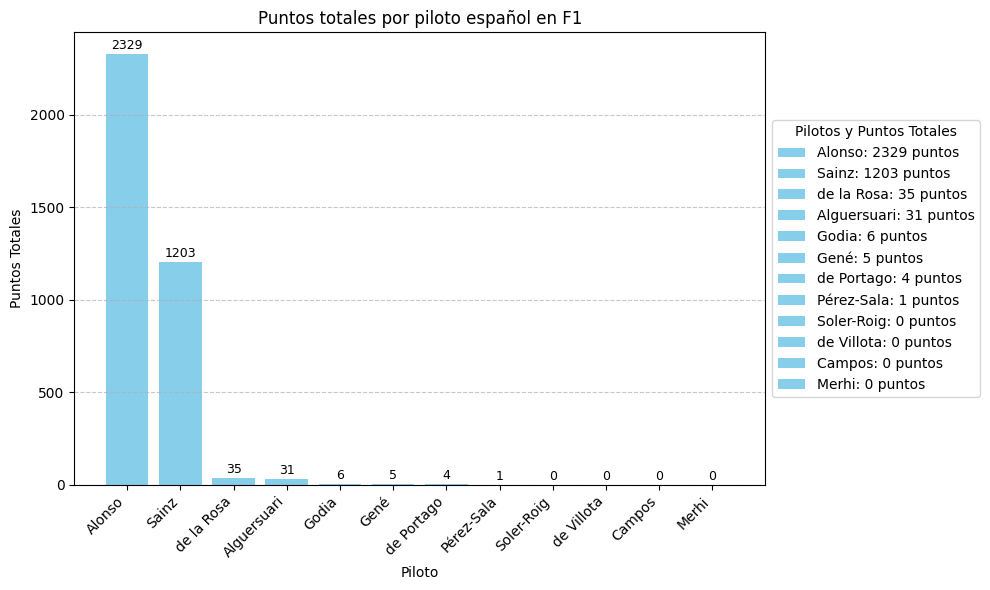

In [75]:
# Preparamos los datos y el gráfico de barras con leyenda de pilotos y puntos totales
plt.figure(figsize=(10, 6))
bars = plt.bar(df_stats_espanoles['surname'], df_stats_espanoles['total_puntos'], color='skyblue')
plt.xlabel('Piloto')
plt.ylabel('Puntos Totales')
plt.title('Puntos totales por piloto español en F1')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos la leyenda como anotaciones encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{int(yval)}', ha='center', va='bottom', fontsize=9)
# Preparamos la leyenda personalizada con piloto y puntos
legend_labels = [f"{name}: {int(points)} puntos" for name, points in zip(df_stats_espanoles['surname'], df_stats_espanoles['total_puntos'])]

# Añadimos la leyenda fuera del gráfico
plt.legend(bars, legend_labels, title='Pilotos y Puntos Totales', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

🎯 2. Número de carreras disputadas (barras horizontales)

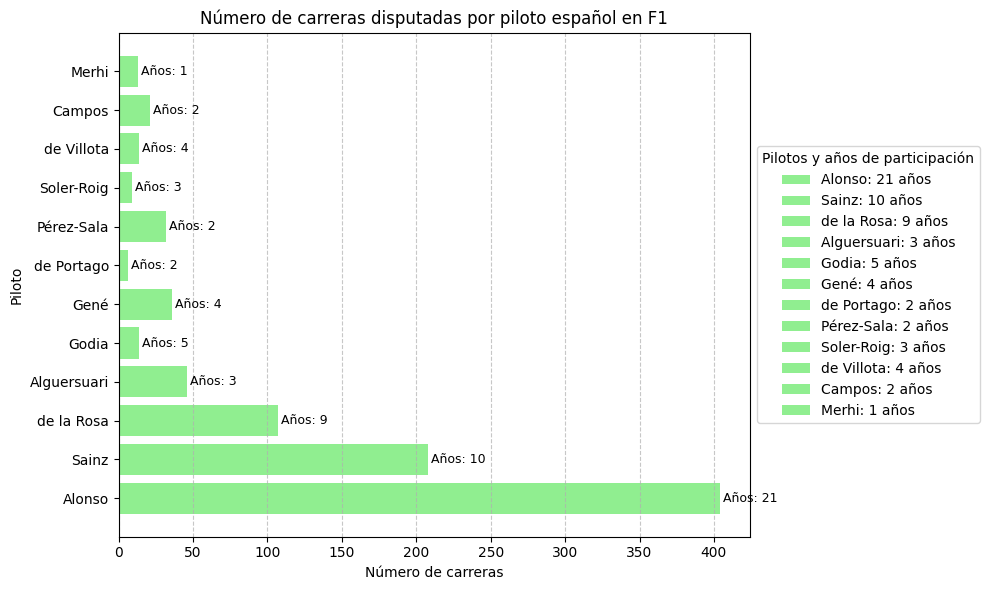

In [76]:
# Creamos el gráfico de barras horizontales con leyenda externa
plt.figure(figsize=(10, 6))
bars = plt.barh(df_stats_espanoles['surname'], df_stats_espanoles['num_carreras'], color='lightgreen')
plt.xlabel('Número de carreras')
plt.ylabel('Piloto')
plt.title('Número de carreras disputadas por piloto español en F1')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadimos los años de participación a la derecha de cada barra
for i, (bar, years) in enumerate(zip(bars, df_stats_espanoles['years_participated'])):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, f"Años: {len(years)}", va='center', fontsize=9)

# Creamos la leyenda personalizada con piloto y años de participación
legend_labels = [f"{name}: {len(years)} años" for name, years in zip(df_stats_espanoles['surname'], df_stats_espanoles['years_participated'])]

# Añadimos la leyenda fuera del gráfico
plt.legend(bars, legend_labels, title='Pilotos y años de participación', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


🎯 3. Número de victorias por piloto (barras)

    Solo para ver la capacidad de ganar carreras (Alonso lidera aquí).

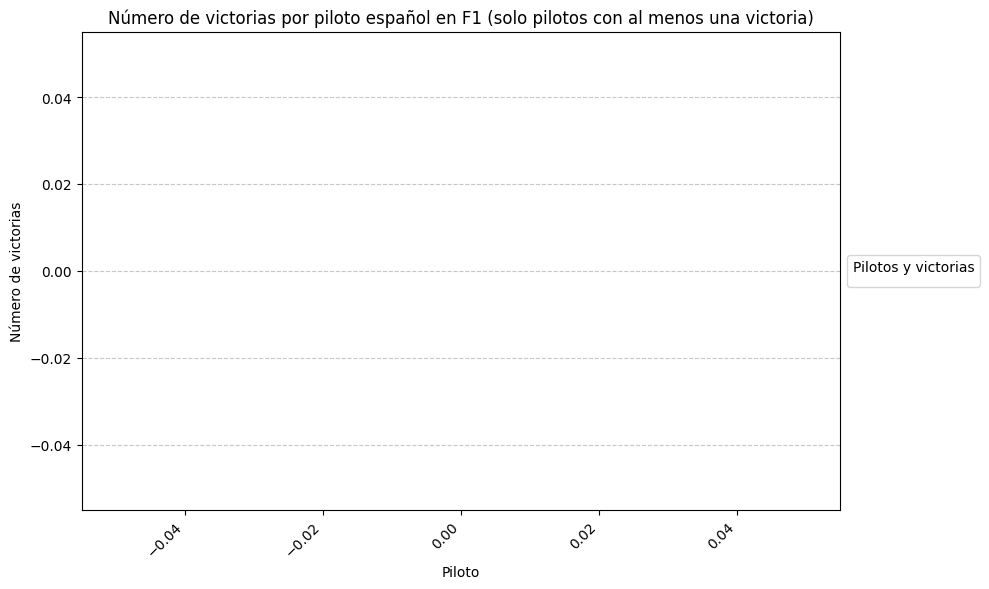

In [77]:
# Filtramos los pilotos con al menos una victoria usando df_stats_espanoles
df_espanoles_con_victorias = df_stats_espanoles[df_stats_espanoles['num_victorias'] > 0]


# Creamos la gráfica de barras para estos pilotos
plt.figure(figsize=(10, 6))
bars = plt.bar(df_espanoles_con_victorias['surname'], df_espanoles_con_victorias['num_victorias'], color='salmon')
plt.xlabel('Piloto')
plt.ylabel('Número de victorias')
plt.title('Número de victorias por piloto español en F1 (solo pilotos con al menos una victoria)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos la leyenda externa con número de victorias por piloto
legend_labels = [f"{name}: {victories} victorias" for name, victories in zip(df_espanoles_con_victorias['surname'], df_espanoles_con_victorias['num_victorias'])]
plt.legend(bars, legend_labels, title='Pilotos y victorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()




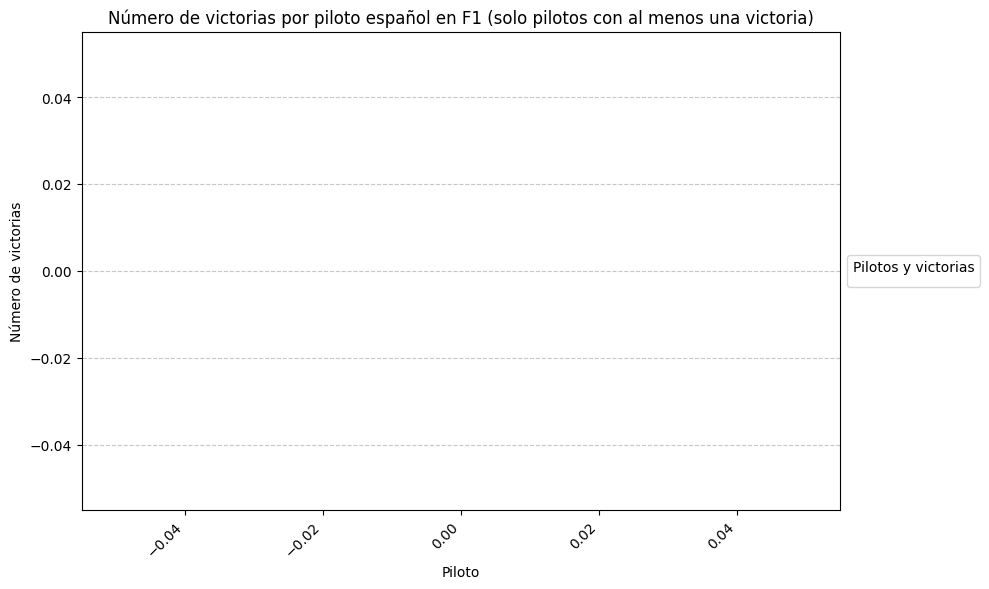

¡Gráfica guardada como 'grafica_victorias_espanoles.png'!


In [78]:
# Filtramos los pilotos con al menos una victoria
df_espanoles_con_victorias = df_stats_espanoles[df_stats_espanoles['num_victorias'] > 0]

# Creamos la gráfica y guardamos como archivo
plt.figure(figsize=(10, 6))
bars = plt.bar(df_espanoles_con_victorias['surname'], df_espanoles_con_victorias['num_victorias'], color='salmon')
plt.xlabel('Piloto')
plt.ylabel('Número de victorias')
plt.title('Número de victorias por piloto español en F1 (solo pilotos con al menos una victoria)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos la leyenda externa
legend_labels = [f"{name}: {victories} victorias" for name, victories in zip(df_espanoles_con_victorias['surname'], df_espanoles_con_victorias['num_victorias'])]
plt.legend(bars, legend_labels, title='Pilotos y victorias', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('grafica_victorias_espanoles.png')  # Guarda la gráfica como archivo PNG
plt.show()  # Cierra la figura para evitar "plots vacíos"

print("¡Gráfica guardada como 'grafica_victorias_espanoles.png'!")


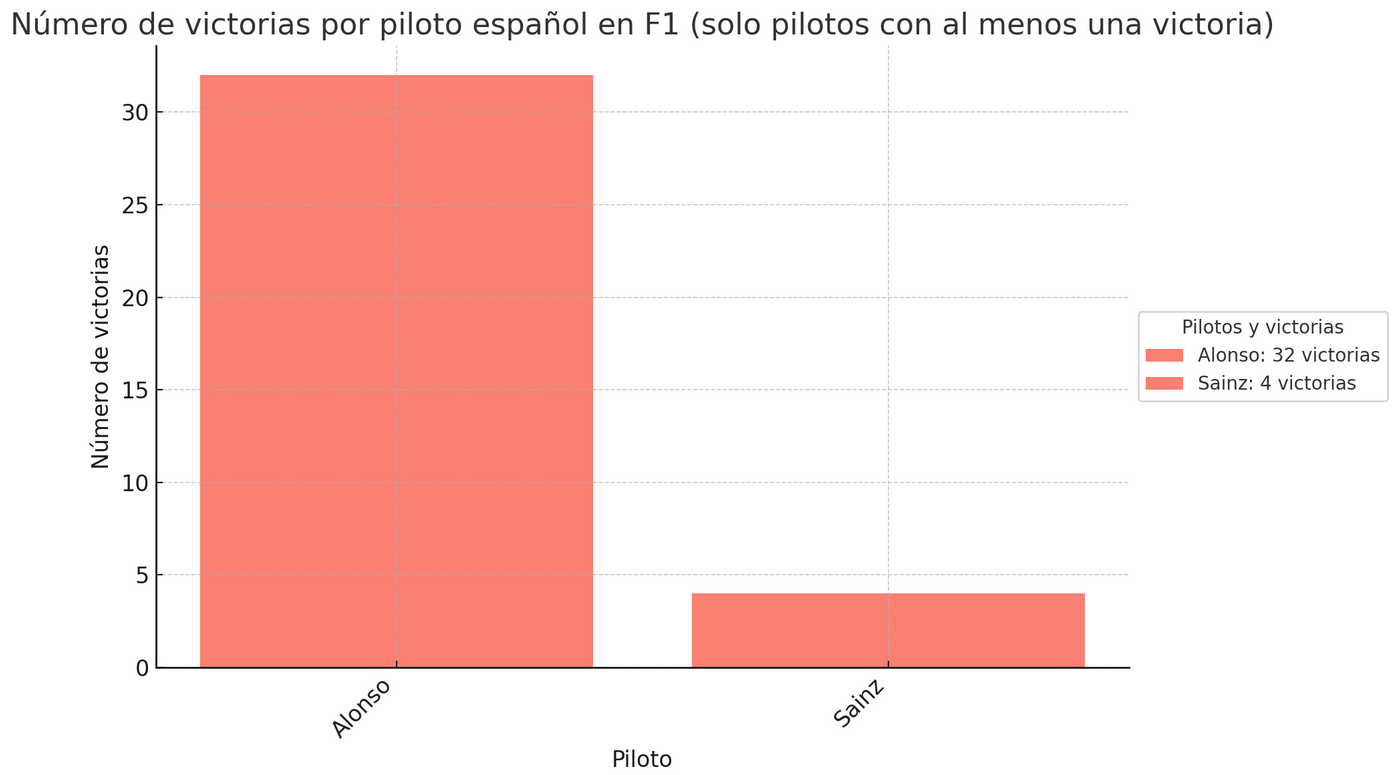

🎯 4. Años en los que compitieron (gráfico de líneas o dispersión)

    Una línea para cada piloto mostrando en qué años participaron, comparando sus carreras.

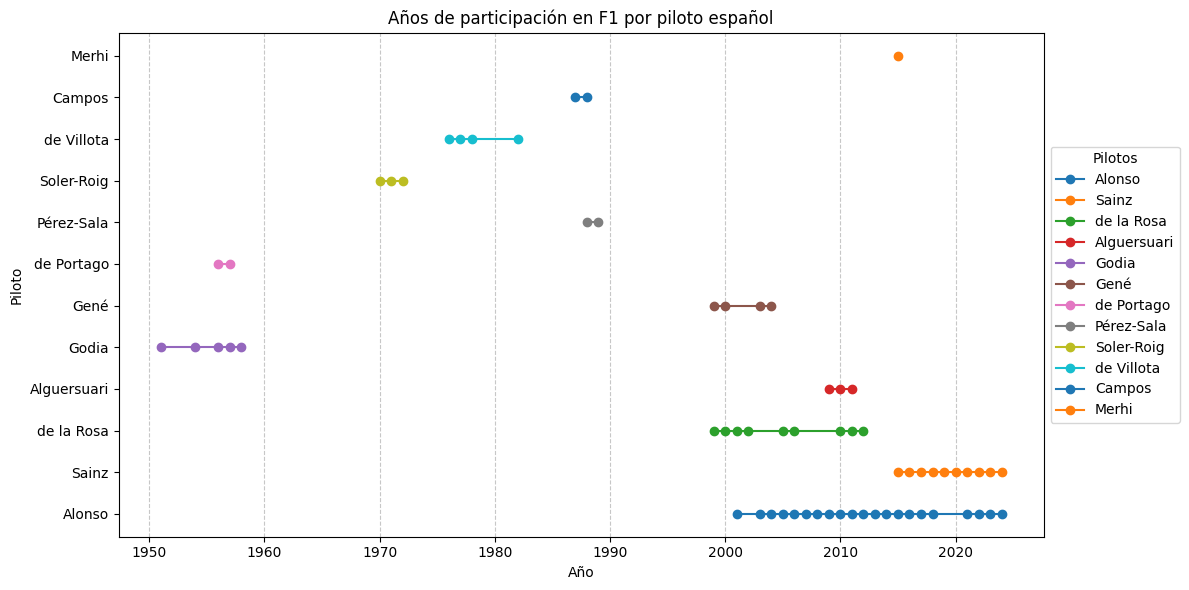

In [79]:
# Para cada piloto, vamos a graficar los años en los que participó

plt.figure(figsize=(12, 6))

# Para cada piloto en df_stats_espanoles
for i, row in df_stats_espanoles.iterrows():
    surname = row['surname']
    years = sorted(row['years_participated'])
    plt.plot(years, [surname] * len(years), marker='o', linestyle='-', label=surname)
    #plt.text(years[-1] + 0.3, surname, surname, va='center', fontsize=9, color='black')
plt.xlabel('Año')
plt.ylabel('Piloto')
plt.title('Años de participación en F1 por piloto español')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadimos la leyenda fuera del gráfico
plt.legend(title='Pilotos', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

    

🎯 5. Constructores por piloto (gráfico tipo heatmap o burbujas)

    Visualizar qué pilotos han corrido con más constructores (Alonso con varios, otros solo con uno o dos).

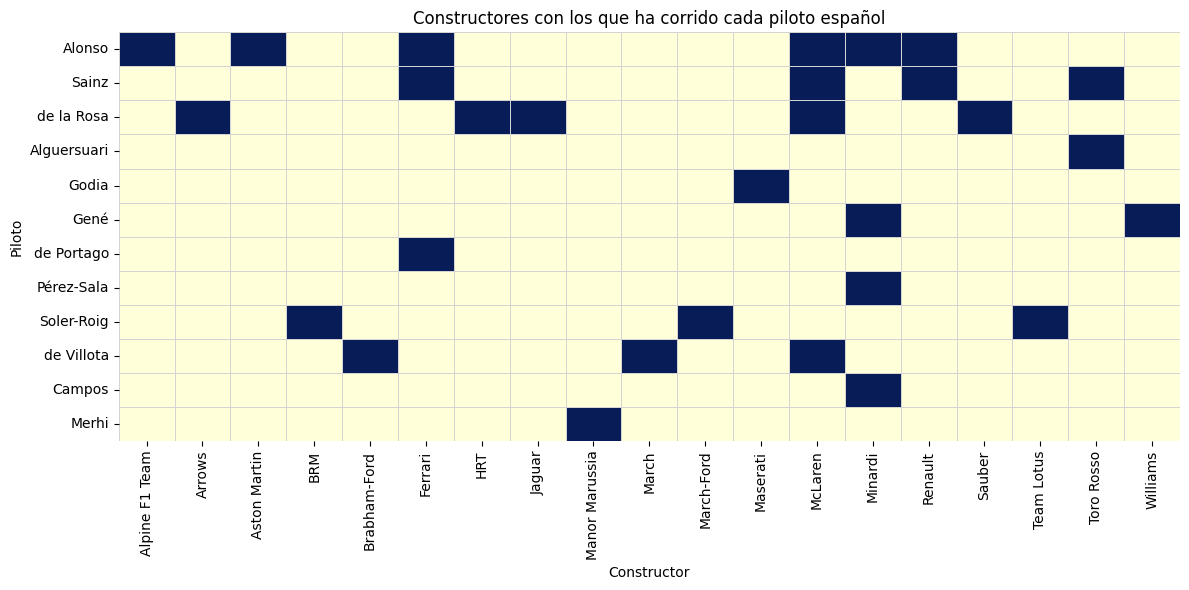

In [80]:
# Primero, creamos un dataframe de ocurrencias: 1 si el piloto ha corrido con el constructor, 0 si no
pilotos = df_stats_espanoles['surname']
constructores = sorted(set(sum([row.split(', ') for row in df_stats_espanoles['constructors']], [])))

# Creamos un dataframe vacío con 0
import numpy as np
heatmap_data = pd.DataFrame(0, index=pilotos, columns=constructores)

# Rellenamos la matriz con 1 donde el piloto ha participado con ese constructor
for i, row in df_stats_espanoles.iterrows():
    surname = row['surname']
    pilotos_constructores = row['constructors'].split(', ')
    for constructor in pilotos_constructores:
        heatmap_data.loc[surname, constructor] = 1

# Creamos el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='lightgray')
plt.title('Constructores con los que ha corrido cada piloto español')
plt.xlabel('Constructor')
plt.ylabel('Piloto')
plt.tight_layout()
plt.show()


🎯 6. Comparativa “multi-variable” (gráfico radar/spider)

    Comparar por piloto: carreras, victorias, puntos, años participados (todas juntas en una visual compacta).

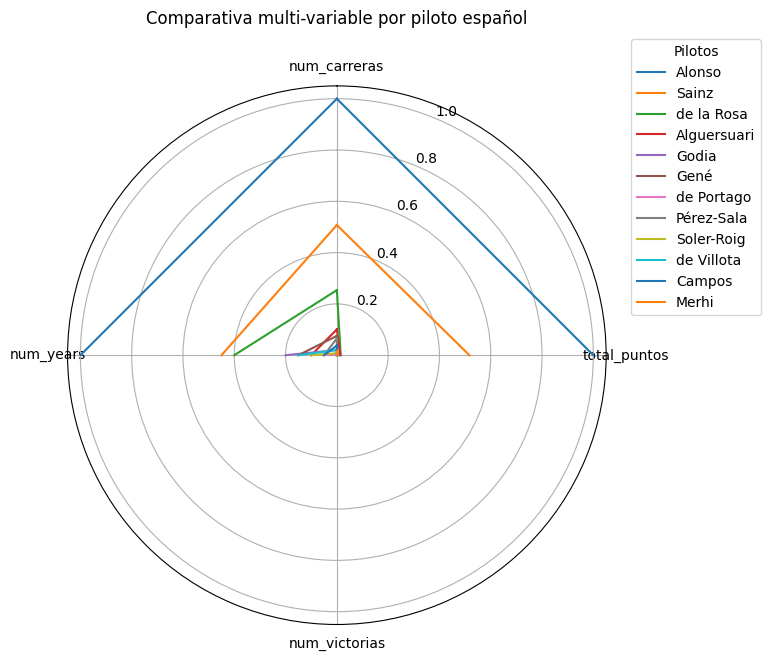

In [81]:
# Vamos a graficar un radar chart con varias métricas para cada piloto (normalizadas)

# Primero, seleccionamos las métricas relevantes
metrics = ['num_carreras', 'total_puntos', 'num_victorias', 'num_years']
df_radar = df_stats_espanoles[['surname'] + metrics].set_index('surname')

# Normalizamos las métricas para que estén entre 0 y 1 (para que sean comparables)
df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Número de variables
num_vars = len(metrics)

# Ángulos para el gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerramos el círculo

# Preparamos la figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True)) # (8,8)

# Graficamos cada piloto en el radar
for idx, row in df_radar_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # Cerramos el círculo
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.1)

# Configuramos las etiquetas
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

plt.title('Comparativa multi-variable por piloto español', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title='Pilotos')

plt.tight_layout()
plt.show()


🎯 7. Ranking final: quién es el más completo (gráfico radar / araña)

    Mostrando que Alonso es el más completo en todas las métricas.

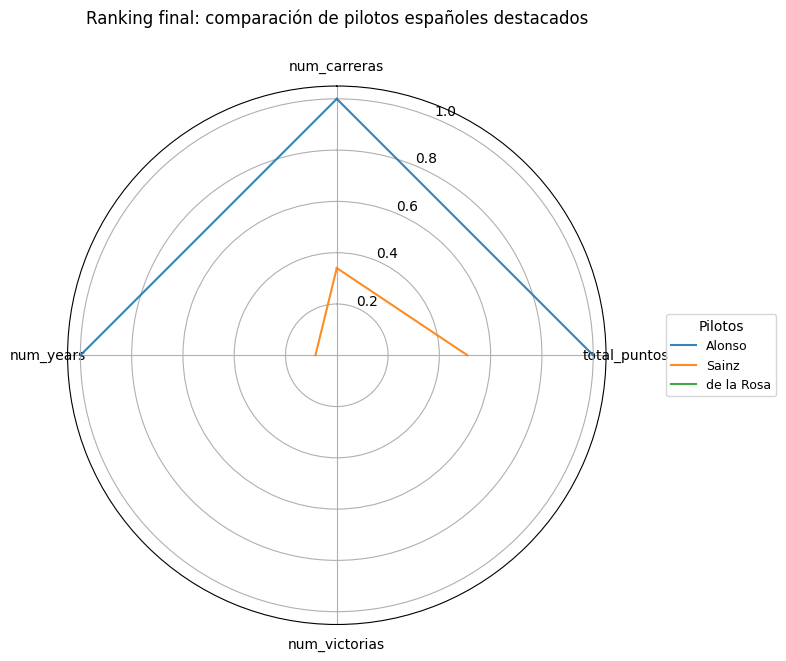

In [82]:
# Seleccionamos solo a Fernando Alonso y a otros destacados (p.ej. Carlos Sainz y De la Rosa)
pilotos_destacados = ['Alonso', 'Sainz', 'de la Rosa']

# Filtramos solo los pilotos destacados
df_radar_destacados = df_stats_espanoles[df_stats_espanoles['surname'].isin(pilotos_destacados)]
df_radar_destacados = df_radar_destacados[['surname', 'num_carreras', 'total_puntos', 'num_victorias', 'num_years']].set_index('surname')

# Normalizamos
df_radar_destacados_norm = (df_radar_destacados - df_radar_destacados.min()) / (df_radar_destacados.max() - df_radar_destacados.min())

# Ángulos
num_vars = len(df_radar_destacados_norm.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Preparamos el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Graficamos cada piloto destacado
for idx, row in df_radar_destacados_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=idx, alpha=0.9)
    ax.fill(angles, values, alpha=0.05)

# Configuramos etiquetas y estilo
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), df_radar_destacados_norm.columns)

plt.title('Ranking final: comparación de pilotos españoles destacados', y=1.1)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=9, title='Pilotos')

plt.tight_layout()
plt.show()


🎯 8. Puntos totales vs. número de carreras (dispersión)

    Visualizar eficiencia: ¿quién sacó más puntos por carrera?

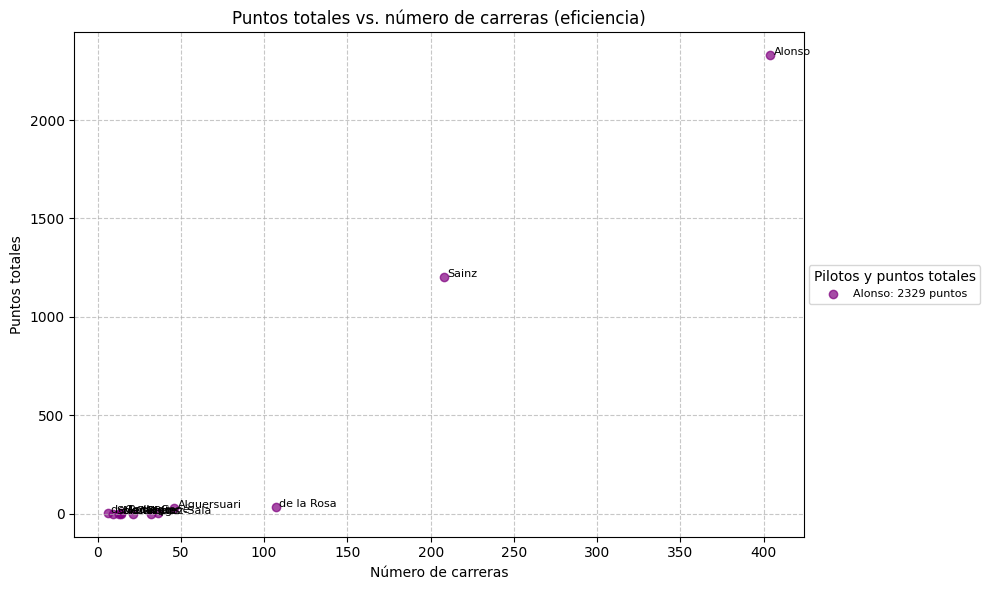

In [83]:
# Calculamos la eficiencia de puntos por carrera
df_stats_espanoles['puntos_por_carrera'] = df_stats_espanoles['total_puntos'] / df_stats_espanoles['num_carreras']

# Creamos el scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_stats_espanoles['num_carreras'], df_stats_espanoles['total_puntos'], color='purple', alpha=0.7)

# Etiquetamos a cada piloto en el scatterplot
for i, row in df_stats_espanoles.iterrows():
    plt.text(row['num_carreras'] + 2, row['total_puntos'], row['surname'], fontsize=8)

# Creamos leyenda externa con piloto y puntos totales
legend_labels = [f"{name}: {int(points)} puntos" for name, points in zip(df_stats_espanoles['surname'], df_stats_espanoles['total_puntos'])]
plt.legend(legend_labels, title='Pilotos y puntos totales', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)


plt.xlabel('Número de carreras')
plt.ylabel('Puntos totales')
plt.title('Puntos totales vs. número de carreras (eficiencia)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


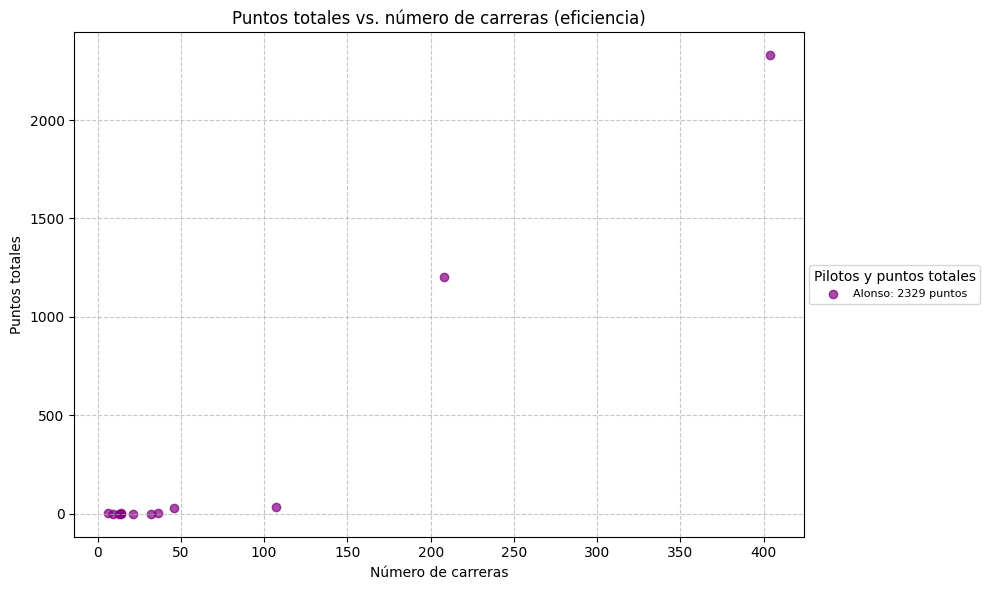

In [84]:
# Creamos el scatterplot con puntos en vez de cruces y leyenda con puntos totales

plt.figure(figsize=(10, 6))
plt.scatter(df_stats_espanoles['num_carreras'], df_stats_espanoles['total_puntos'], color='purple', alpha=0.7, marker='o')

plt.xlabel('Número de carreras')
plt.ylabel('Puntos totales')
plt.title('Puntos totales vs. número de carreras (eficiencia)')
plt.grid(True, linestyle='--', alpha=0.7)

# Creamos leyenda externa con piloto y puntos totales
legend_labels = [f"{name}: {int(points)} puntos" for name, points in zip(df_stats_espanoles['surname'], df_stats_espanoles['total_puntos'])]
plt.legend(legend_labels, title='Pilotos y puntos totales', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.tight_layout()
plt.show()


Pilotos españoles encontrados:
     driverId    driverRef      surname
3           4       alonso       Alonso
36         37         rosa   de la Rosa
47         48         gene         Gené
152       153  alguersuari  Alguersuari
158       159         sala   Pérez-Sala
166       167       campos       Campos
207       208      villota   de Villota
278       279       zapico       Zapico
338       339         roig   Soler-Roig
504       504        creus        Creus
580       580        godia        Godia
606       606      portago   de Portago
782       782        jover        Jover
831       832        sainz        Sainz
832       833        merhi        Merhi

Datos finales de los pilotos españoles:
   Piloto_ID  Piloto   Año                Carrera  Posición_Salida  \
0          4  Alonso  2008  Australian Grand Prix               11   
1          4  Alonso  2008   Malaysian Grand Prix                7   
2          4  Alonso  2008     Bahrain Grand Prix               10   
3       

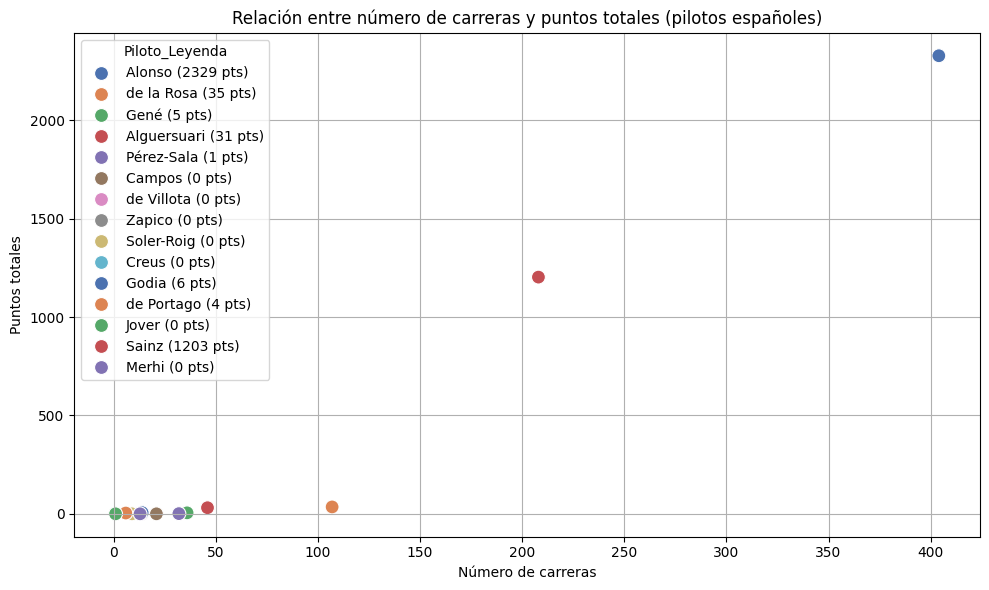

In [85]:
# Paso 2: Filtramos a los pilotos españoles
# Usamos la columna 'nationality' del CSV de pilotos para quedarnos solo con los españoles
spanish_drivers = drivers[drivers['nationality'] == 'Spanish']

# Mostramos los pilotos españoles encontrados para confirmar los datos
print("Pilotos españoles encontrados:")
print(spanish_drivers[['driverId', 'driverRef', 'surname']])

# Paso 3: Unimos los datos para obtener la información completa de los resultados de cada piloto español
# 3.1: Unimos 'results' con 'drivers' usando 'driverId' para tener datos básicos del piloto en cada resultado
spanish_results = pd.merge(results, spanish_drivers[['driverId', 'surname']], on='driverId')

# 3.2: Unimos con 'races' usando 'raceId' para obtener año y nombre de la carrera
spanish_results = pd.merge(spanish_results, races[['raceId', 'year', 'name']], on='raceId')

# 3.3: Unimos con 'constructors' usando 'constructorId' para saber el equipo con el que compitió
spanish_results = pd.merge(spanish_results, constructors[['constructorId', 'name']], on='constructorId', suffixes=('', '_constructor'))

# Paso 4: Seleccionamos las columnas clave para el análisis final
# Incluimos 'driverId' para identificar de manera única al piloto
spanish_results_df = spanish_results[['driverId', 'surname', 'year', 'name', 'grid', 'positionOrder', 'points', 'name_constructor']]

# Renombramos las columnas para mayor claridad
spanish_results_df.columns = ['Piloto_ID', 'Piloto', 'Año', 'Carrera', 'Posición_Salida', 'Posición_Final', 'Puntos', 'Constructor']

# Paso 5: Guardamos esta tabla en un CSV para usarla más adelante en la presentación
#spanish_results_df.to_csv("Datos_csv_creados/spanish_drivers_results.csv", index=False)

# Mostramos las primeras filas para verificar el resultado
print("\nDatos finales de los pilotos españoles:")
print(spanish_results_df.head())

# Paso 6: Calculamos el número de carreras en las que participó cada piloto español
# Agrupamos por 'Piloto_ID' y 'Piloto' para contar las filas (carreras)
carreras_por_piloto = spanish_results_df.groupby(['Piloto_ID', 'Piloto']).size().reset_index(name='Numero_Carreras')

# Mostramos la tabla para confirmar el número de carreras por piloto
print("\nNúmero de carreras por piloto español:")
print(carreras_por_piloto)

# Paso 7: Calculamos los puntos totales de cada piloto español
# Agrupamos por 'Piloto_ID' y 'Piloto' y sumamos la columna 'Puntos'
puntos_por_piloto = spanish_results_df.groupby(['Piloto_ID', 'Piloto'])['Puntos'].sum().reset_index(name='Puntos_Totales')

# Mostramos la tabla de puntos totales por piloto para comprobar los datos
print("\nPuntos totales por piloto español:")
print(puntos_por_piloto)

# Paso 8: Unimos las tablas de número de carreras y puntos totales para ver la relación
# Usamos 'Piloto_ID' y 'Piloto' como llaves
resumen_pilotos = pd.merge(carreras_por_piloto, puntos_por_piloto, on=['Piloto_ID', 'Piloto'])

# Mostramos la tabla resumen con número de carreras y puntos totales
print("\nResumen de carreras y puntos totales por piloto español:")
print(resumen_pilotos)
resumen_pilotos = pd.read_csv("../Datos/Datos_csv_creados/spanish_drivers_carreras_puntos.csv")


# Creamos un DataFrame auxiliar que combina el nombre del piloto y sus puntos totales para la leyenda
resumen_pilotos['Piloto_Leyenda'] = resumen_pilotos.apply(
    lambda row: f"{row['Piloto']} ({int(row['Puntos_Totales'])} pts)", axis=1
)

# Gráfico scatter plot
plt.figure(figsize=(10, 6))

# Dibujamos el scatter plot usando 'Piloto_Leyenda' como leyenda
# De esta manera, los puntos en el gráfico tienen la leyenda de 'piloto + puntos totales'
sns.scatterplot(data=resumen_pilotos,
                x='Numero_Carreras',
                y='Puntos_Totales',
                hue='Piloto_Leyenda',
                s=100,
                palette='deep')

plt.title('Relación entre número de carreras y puntos totales (pilotos españoles)')
plt.xlabel('Número de carreras')
plt.ylabel('Puntos totales')
plt.grid(True)
plt.tight_layout()

# Guardamos la gráfica en la carpeta img
# plt.savefig("img/scatter_carreras_vs_puntos_leyenda_v1.png")
plt.show()

## 🏆 Hipótesis 2: Tiene un mejor rendimiento en carrera. 

In [86]:
# Aseguramos que las columnas están en formato numérico
df_espanoles_mas_5_carreras['grid'] = pd.to_numeric(df_espanoles_mas_5_carreras['grid'], errors='coerce')
df_espanoles_mas_5_carreras['position'] = pd.to_numeric(df_espanoles_mas_5_carreras['position'], errors='coerce')

# Creamos la columna diferencia_posiciones
df_espanoles_mas_5_carreras['diferencia_posiciones'] = df_espanoles_mas_5_carreras['grid'] - df_espanoles_mas_5_carreras['position']

# Ahora filtramos solo a Alonso
df_alonso = df_espanoles_mas_5_carreras[df_espanoles_mas_5_carreras['driverId'] == 4]

# Nos quedamos con las columnas relevantes
df_alonso = df_alonso[['driverId', 'surname', 'raceId', 'name', 'year', 'grid', 'position', 'diferencia_posiciones']]

# Mostramos el dataframe
df_alonso.info()


<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 746 to 1149
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   driverId               404 non-null    int64  
 1   surname                404 non-null    object 
 2   raceId                 404 non-null    int64  
 3   name                   404 non-null    object 
 4   year                   404 non-null    int64  
 5   grid                   404 non-null    int64  
 6   position               334 non-null    float64
 7   diferencia_posiciones  334 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 28.4+ KB


C:\Users\Ira\AppData\Local\Temp\ipykernel_2912\435011080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espanoles_mas_5_carreras['grid'] = pd.to_numeric(df_espanoles_mas_5_carreras['grid'], errors='coerce')
C:\Users\Ira\AppData\Local\Temp\ipykernel_2912\435011080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espanoles_mas_5_carreras['position'] = pd.to_numeric(df_espanoles_mas_5_carreras['position'], errors='coerce')
C:\Users\Ira\AppData\Local\Temp\ipykernel_2912\435011080.py:6: SettingWith

Este dataframe revela que hay valores NaN debido a que no se termino la carrera. 
Realizaremos dos gráficas: 

1️⃣ Uno manteniendo los NaN y sustituyendo por la posición máxima de salida.  
2️⃣ Otro solo con las carreras terminadas (sin NaN).



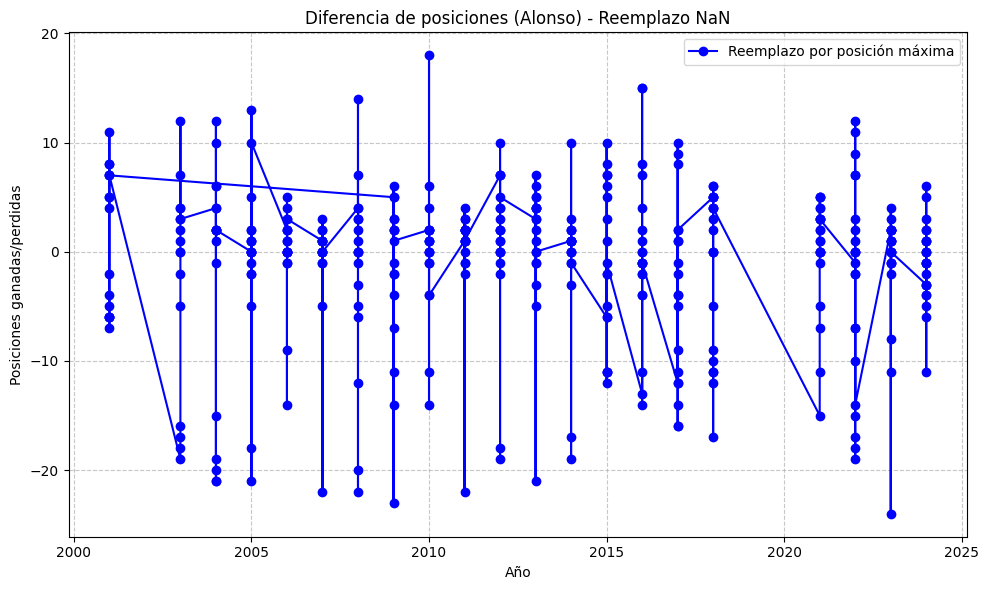

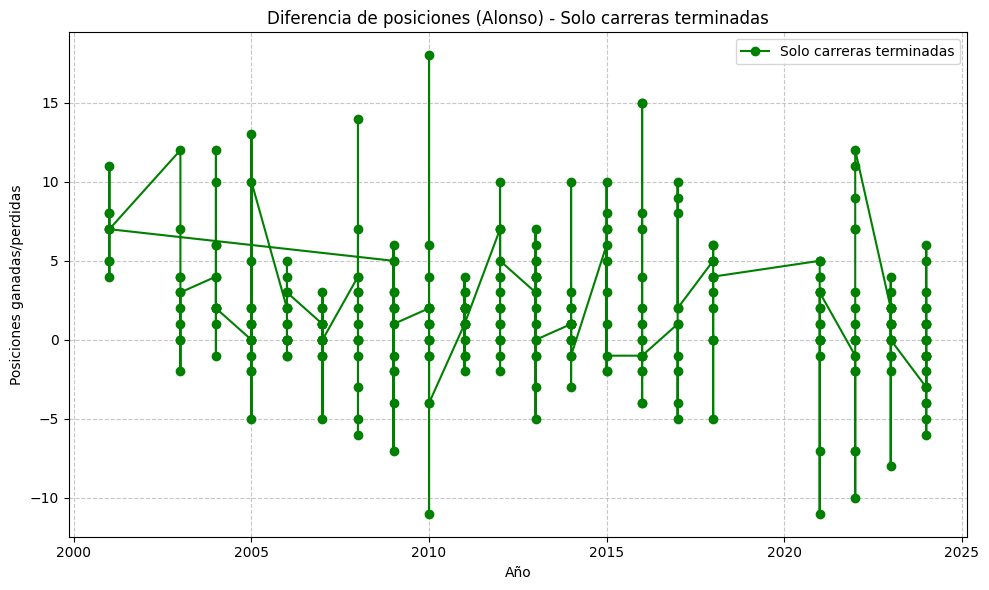

In [87]:
# Verificamos la posición máxima de salida (grid) en el dataframe de Alonso
max_grid = df_alonso['grid'].max()




# Primero, generamos la gráfica manteniendo los NaN pero reemplazándolos por la posición máxima de salida
df_alonso_reemplazo = df_alonso.copy()
df_alonso_reemplazo['position_reemplazo'] = df_alonso_reemplazo['position'].fillna(max_grid)
df_alonso_reemplazo['diferencia_posiciones_reemplazo'] = df_alonso_reemplazo['grid'] - df_alonso_reemplazo['position_reemplazo']

# Gráfica con reemplazo
plt.figure(figsize=(10, 6))
plt.plot(df_alonso_reemplazo['year'], df_alonso_reemplazo['diferencia_posiciones_reemplazo'], marker='o', color='blue', label='Reemplazo por posición máxima')
plt.xlabel('Año')
plt.ylabel('Posiciones ganadas/perdidas')
plt.title('Diferencia de posiciones (Alonso) - Reemplazo NaN')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Segundo, generamos la gráfica solo con las carreras que terminó (sin NaN)
df_alonso_terminadas = df_alonso.dropna(subset=['position']).copy()
df_alonso_terminadas['diferencia_posiciones'] = df_alonso_terminadas['grid'] - df_alonso_terminadas['position']

# Gráfica solo con carreras terminadas
plt.figure(figsize=(10, 6))
plt.plot(df_alonso_terminadas['year'], df_alonso_terminadas['diferencia_posiciones'], marker='o', color='green', label='Solo carreras terminadas')
plt.xlabel('Año')
plt.ylabel('Posiciones ganadas/perdidas')
plt.title('Diferencia de posiciones (Alonso) - Solo carreras terminadas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


🔵 La primera muestra todas las carreras (incluso abandonos, usando la posición máxima de salida como reemplazo).  
🟢 La segunda incluye solo las carreras que Alonso terminó.

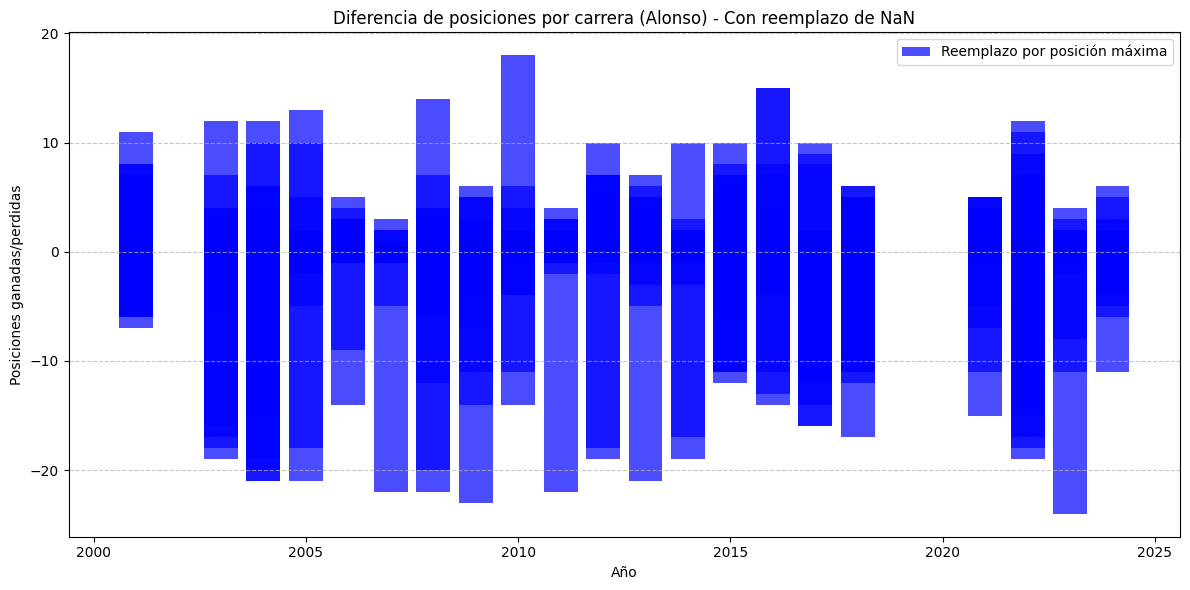

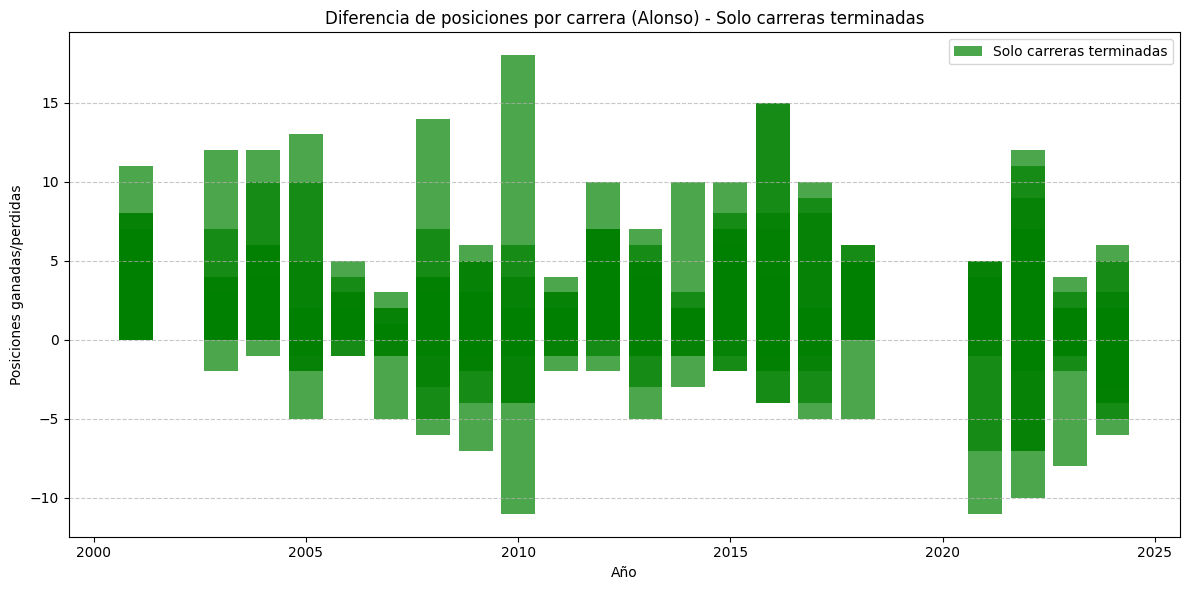

In [88]:
# Creamos gráfico de barras con reemplazo de NaN por la posición máxima
plt.figure(figsize=(12, 6))
plt.bar(df_alonso_reemplazo['year'], df_alonso_reemplazo['diferencia_posiciones_reemplazo'], color='blue', alpha=0.7, label='Reemplazo por posición máxima')
plt.xlabel('Año')
plt.ylabel('Posiciones ganadas/perdidas')
plt.title('Diferencia de posiciones por carrera (Alonso) - Con reemplazo de NaN')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Creamos gráfico de barras solo con carreras terminadas
plt.figure(figsize=(12, 6))
plt.bar(df_alonso_terminadas['year'], df_alonso_terminadas['diferencia_posiciones'], color='green', alpha=0.7, label='Solo carreras terminadas')
plt.xlabel('Año')
plt.ylabel('Posiciones ganadas/perdidas')
plt.title('Diferencia de posiciones por carrera (Alonso) - Solo carreras terminadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


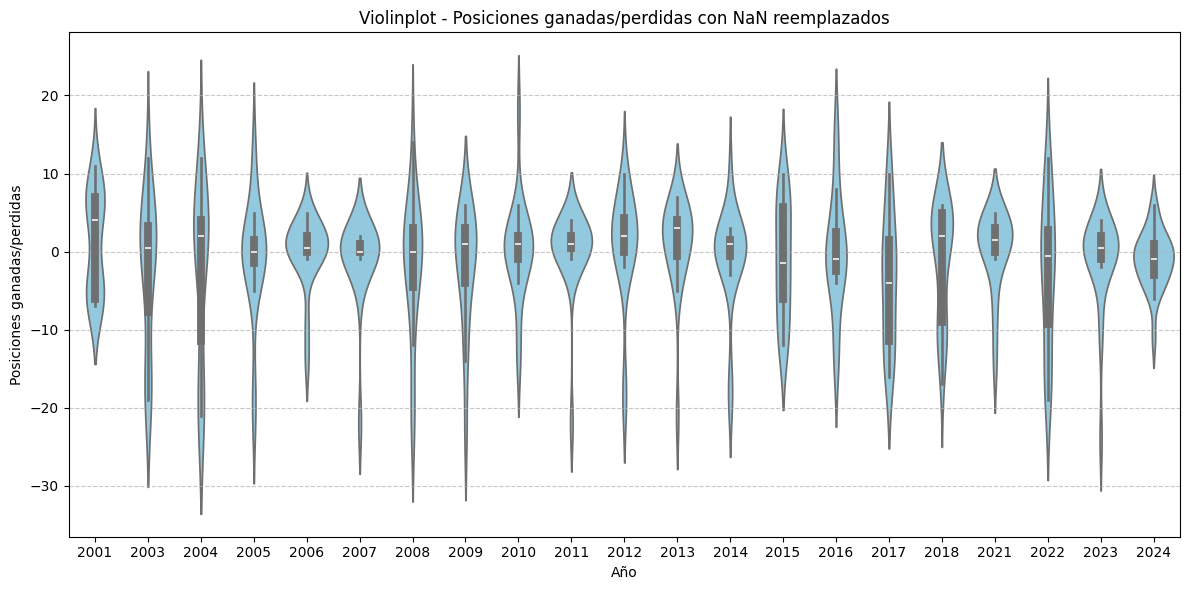

In [89]:
# Violinplot - carreras con NaN reemplazados
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_alonso_reemplazo, x='year', y='diferencia_posiciones_reemplazo', color='skyblue')
plt.title('Violinplot - Posiciones ganadas/perdidas con NaN reemplazados')
plt.ylabel('Posiciones ganadas/perdidas')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

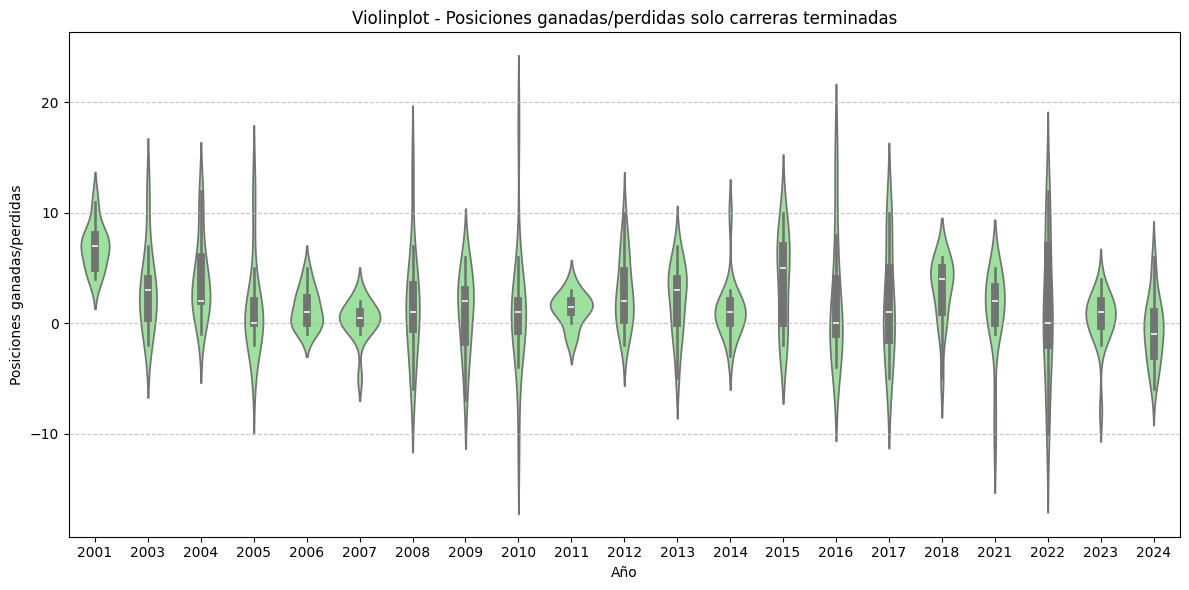

In [90]:
# Violinplot - solo carreras terminadas
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_alonso_terminadas, x='year', y='diferencia_posiciones', color='lightgreen')
plt.title('Violinplot - Posiciones ganadas/perdidas solo carreras terminadas')
plt.ylabel('Posiciones ganadas/perdidas')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

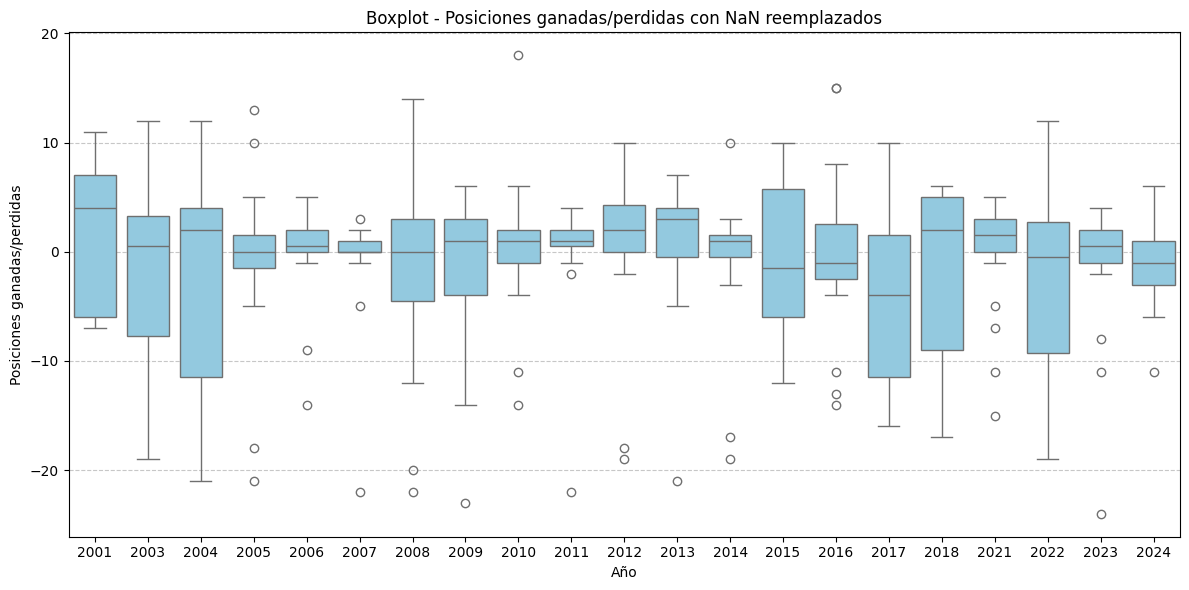

In [91]:
# Boxplot - carreras con NaN reemplazados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_alonso_reemplazo, x='year', y='diferencia_posiciones_reemplazo', color='skyblue')
plt.title('Boxplot - Posiciones ganadas/perdidas con NaN reemplazados')
plt.ylabel('Posiciones ganadas/perdidas')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

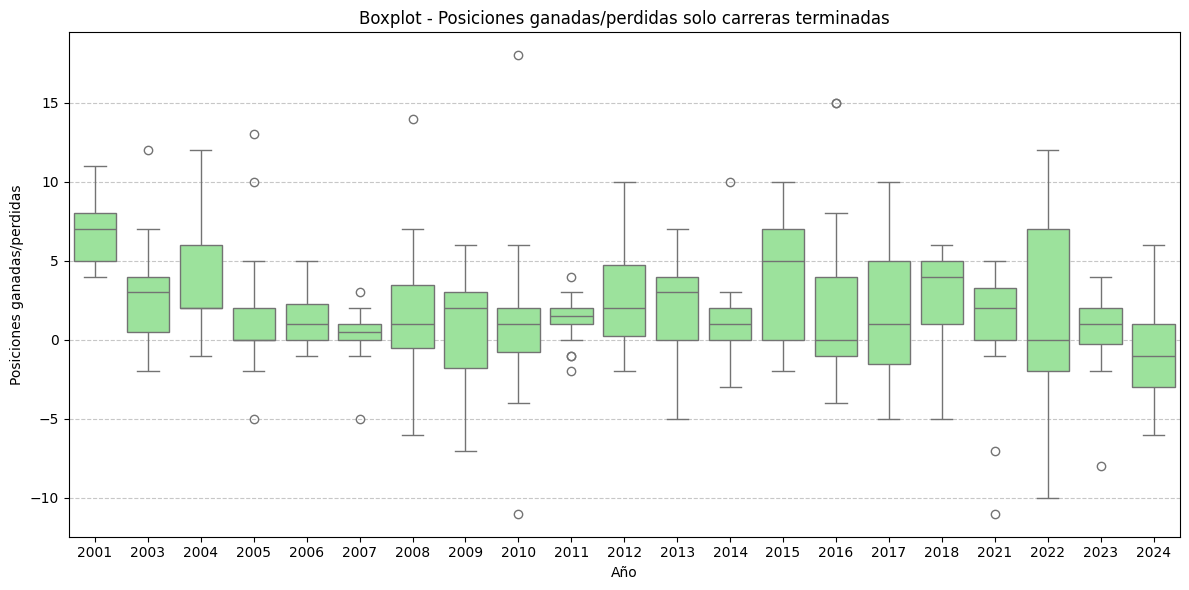

In [92]:
# Boxplot - solo carreras terminadas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_alonso_terminadas, x='year', y='diferencia_posiciones', color='lightgreen')
plt.title('Boxplot - Posiciones ganadas/perdidas solo carreras terminadas')
plt.ylabel('Posiciones ganadas/perdidas')
plt.xlabel('Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

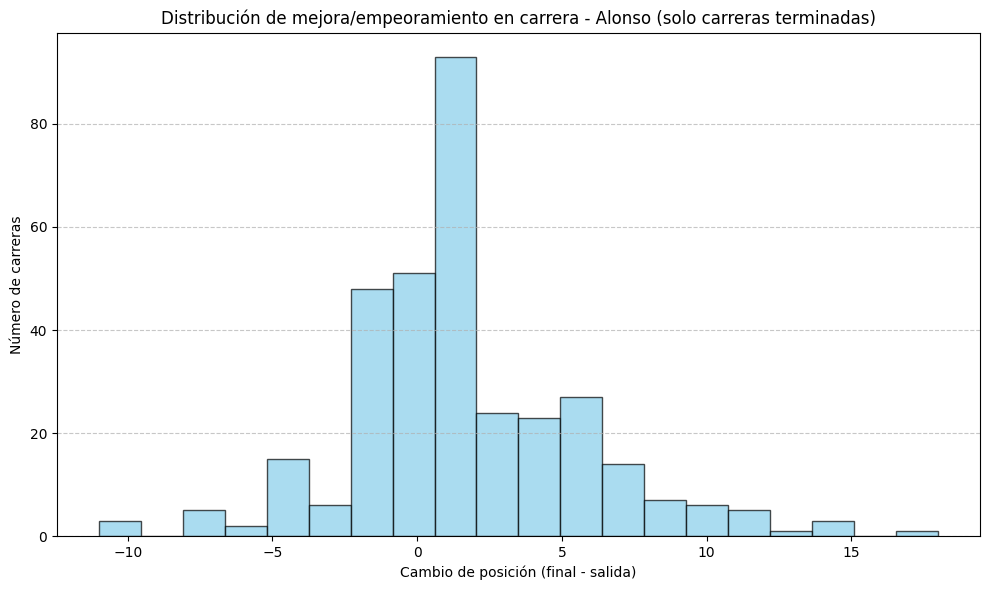

(np.float64(1.7035928143712575), np.float64(1.0), np.float64(0.0))

In [93]:
# Primero, creamos el histograma con las diferencias de posiciones de Alonso (solo carreras terminadas)
plt.figure(figsize=(10, 6))
plt.hist(df_alonso_terminadas['diferencia_posiciones'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Cambio de posición (final - salida)')
plt.ylabel('Número de carreras')
plt.title('Distribución de mejora/empeoramiento en carrera - Alonso (solo carreras terminadas)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculamos media, mediana y moda
media_alonso = df_alonso_terminadas['diferencia_posiciones'].mean()
mediana_alonso = df_alonso_terminadas['diferencia_posiciones'].median()
moda_alonso = df_alonso_terminadas['diferencia_posiciones'].mode()[0]  # La moda puede tener múltiples valores, tomamos el primero

(media_alonso, mediana_alonso, moda_alonso)


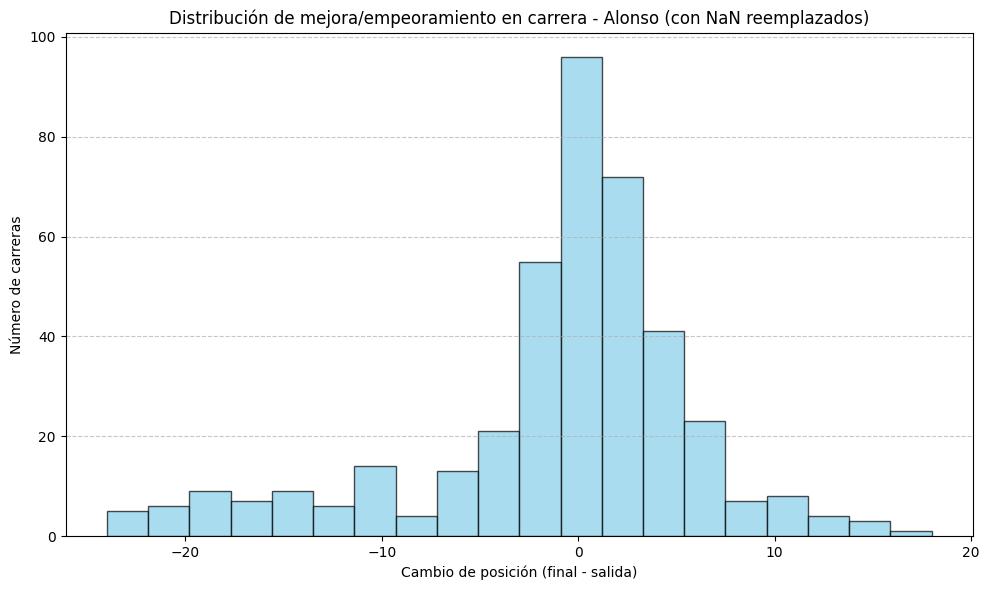

(np.float64(-0.9232673267326733), np.float64(1.0), np.float64(0.0))

In [94]:
#Generamos el histograma de Alonso con NaN reemplazados por posición máxima de salida
plt.figure(figsize=(10, 6))
plt.hist(df_alonso_reemplazo['diferencia_posiciones_reemplazo'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Cambio de posición (final - salida)')
plt.ylabel('Número de carreras')
plt.title('Distribución de mejora/empeoramiento en carrera - Alonso (con NaN reemplazados)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculamos media, mediana y moda para todas las carreras (con NaN reemplazados)
media_alonso_all = df_alonso_reemplazo['diferencia_posiciones_reemplazo'].mean()
mediana_alonso_all = df_alonso_reemplazo['diferencia_posiciones_reemplazo'].median()
moda_alonso_all = df_alonso_reemplazo['diferencia_posiciones_reemplazo'].mode()[0]

(media_alonso_all, mediana_alonso_all, moda_alonso_all)


🎯 1️⃣ Distribución general de posiciones ganadas/perdidas

    Tanto en carreras terminadas como en todas (con NaN reemplazados), la moda y la mediana están alrededor de 0 y 1.

    Esto sugiere que Alonso tiende a mantener o mejorar ligeramente su posición inicial en carrera, en la mayoría de las carreras.

🎯 2️⃣ Media de posiciones

    Con carreras terminadas: +1.70

    Con todas las carreras: -0.92
    ✅ Esto indica que cuando termina la carrera, Alonso suele ganar posiciones en promedio (mejora de casi 2 posiciones).
    ❌ Pero si incluimos los abandonos (NaN como última posición), la media se vuelve ligeramente negativa: pierde 1 posición promedio.
    💡 Esto demuestra que los abandonos tienen un efecto muy fuerte en su rendimiento global (cuando termina, rinde muy bien).

🎯 3️⃣ Violinplots y boxplots año a año

    Muestran que hay años en los que Alonso tiene más consistencia en ganar posiciones, y otros donde fluctúa más.

    En algunos años, el rango de posiciones ganadas/perdidas es muy amplio: carreras con muchas posiciones ganadas y otras con pérdidas grandes.

🎯 4️⃣ Distribución asimétrica

    Los histogramas muestran que la mayoría de carreras se agrupan alrededor de 0-5 posiciones ganadas, pero hay colas que representan pérdidas más grandes (en abandonos o problemas).

🎯 Conclusión final
✅ Alonso suele ser un piloto consistente: cuando termina la carrera, mejora su posición inicial en la mayoría de casos.
❌ Sin embargo, los abandonos (accidentes o problemas técnicos) afectan bastante su promedio global.

y ahora se me ocurren otras preguntas....

🎯 1️⃣ Tendencias temporales
Podemos ver si hay tendencias en los datos a lo largo de los años:  
✅ ¿Está mejorando o empeorando la media de posiciones ganadas/perdidas con el paso del tiempo?  
✅ Usar una línea de regresión o un promedio móvil.  

🎯 2️⃣ Carreras más destacadas  
Listar o visualizar:  
✅ Las carreras donde más posiciones ganó  
✅ Y donde más perdió  
¡Sería interesante ver qué carreras destacan!  

🎯 3️⃣ Comportamiento según el circuito  
Podemos ver si hay circuitos donde suele mejorar más posiciones.  
💡 Podríamos sacar un ranking de sus circuitos más favorables.  

🎯 4️⃣ Comparación entre etapas  
Podríamos comparar los primeros años de Alonso con los últimos para ver si su estilo ha cambiado (más agresivo, más conservador…).  

🎯 5️⃣ Comparativa “constructor”  
Si quieres, podemos ver cómo cambia su rendimiento dependiendo del constructor con el que corría en cada época.  

🎯 1️⃣ Tendencias temporales
Podemos ver si hay tendencias en los datos a lo largo de los años:  
✅ ¿Está mejorando o empeorando la media de posiciones ganadas/perdidas con el paso del tiempo?  
✅ Usar una línea de regresión o un promedio móvil.  

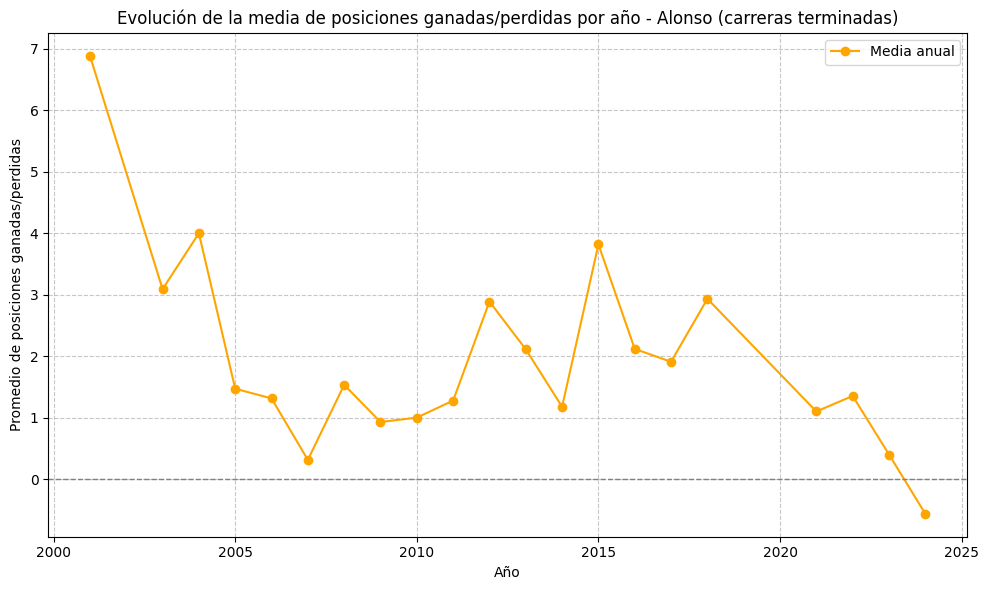

In [95]:
# Calculamos la media de diferencia de posiciones por año (solo carreras terminadas)
media_anual_alonso = df_alonso_terminadas.groupby('year')['diferencia_posiciones'].mean().reset_index()

# Gráfico de línea de la evolución de la media por año
plt.figure(figsize=(10, 6))
plt.plot(media_anual_alonso['year'], media_anual_alonso['diferencia_posiciones'], marker='o', color='orange', label='Media anual')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Año')
plt.ylabel('Promedio de posiciones ganadas/perdidas')
plt.title('Evolución de la media de posiciones ganadas/perdidas por año - Alonso (carreras terminadas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



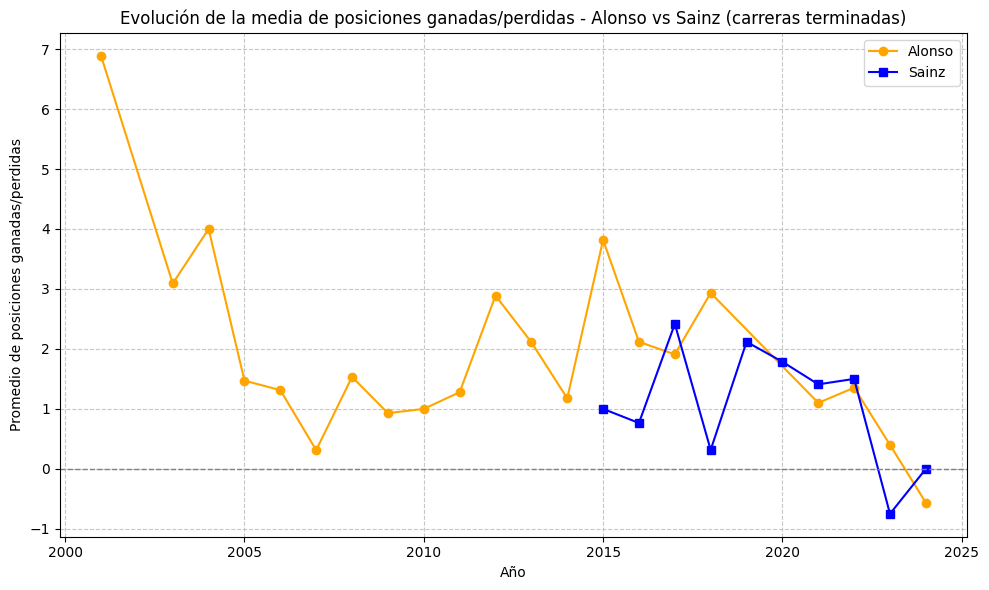

,year,diferencia_posiciones
0,2015,1.000000
1,2016,0.764706
2,2017,2.416667
3,2018,0.315789
4,2019,2.117647
5,2020,1.785714
6,2021,1.409091
7,2022,1.500000
8,2023,-0.750000
9,2024,0.000000


In [96]:
# Filtramos las carreras de Carlos Sainz (driverId de Sainz, que normalmente es 832, pero lo verificamos primero)
driver_ids_sainz = df_espanoles_mas_5_carreras[df_espanoles_mas_5_carreras['surname'] == 'Sainz']['driverId'].unique()
driver_id_sainz = driver_ids_sainz[0]  # Tomamos el primero

# Filtramos sus carreras y solo las terminadas (position no nulo)
df_sainz = df_espanoles_mas_5_carreras[df_espanoles_mas_5_carreras['driverId'] == driver_id_sainz].copy()
df_sainz_terminadas = df_sainz.dropna(subset=['position']).copy()
df_sainz_terminadas['diferencia_posiciones'] = df_sainz_terminadas['grid'] - df_sainz_terminadas['position']

# Calculamos la media por año para Sainz
media_anual_sainz = df_sainz_terminadas.groupby('year')['diferencia_posiciones'].mean().reset_index()

# Gráfica comparativa Alonso vs Sainz
plt.figure(figsize=(10, 6))
plt.plot(media_anual_alonso['year'], media_anual_alonso['diferencia_posiciones'], marker='o', color='orange', label='Alonso')
plt.plot(media_anual_sainz['year'], media_anual_sainz['diferencia_posiciones'], marker='s', color='blue', label='Sainz')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Año')
plt.ylabel('Promedio de posiciones ganadas/perdidas')
plt.title('Evolución de la media de posiciones ganadas/perdidas - Alonso vs Sainz (carreras terminadas)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

media_anual_sainz


🎯 2️⃣ Carreras más destacadas  
Listar o visualizar:  
✅ Las carreras donde más posiciones ganó  
✅ Y donde más perdió  
¡Sería interesante ver qué carreras destacan! 

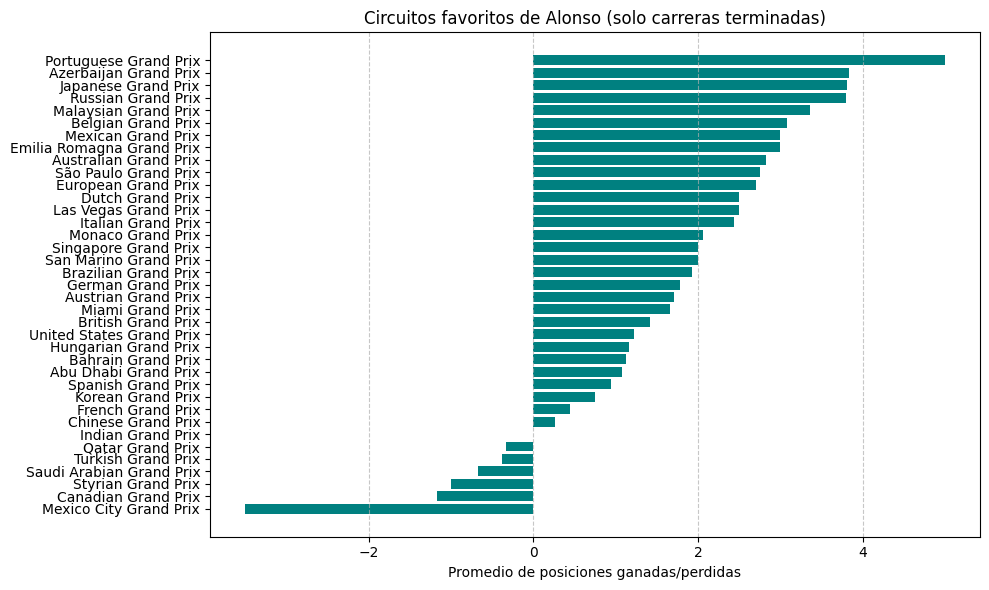

,name,diferencia_posiciones
26,Portuguese Grand Prix,5.000000
3,Azerbaijan Grand Prix,3.833333
18,Japanese Grand Prix,3.812500
28,Russian Grand Prix,3.800000
21,Malaysian Grand Prix,3.357143
5,Belgian Grand Prix,3.083333
22,Mexican Grand Prix,3.000000
11,Emilia Romagna Grand Prix,3.000000
1,Australian Grand Prix,2.823529
34,São Paulo Grand Prix,2.750000


In [97]:
# Calculamos la media de diferencia de posiciones por circuito para Alonso (solo carreras terminadas)
media_circuito_alonso = df_alonso_terminadas.groupby('name')['diferencia_posiciones'].mean().reset_index()

# Ordenamos por la media (de mayor a menor)
media_circuito_alonso = media_circuito_alonso.sort_values(by='diferencia_posiciones', ascending=False)

# Gráfico de barras con los circuitos donde más mejora posiciones Alonso
plt.figure(figsize=(10, 6))
plt.barh(media_circuito_alonso['name'], media_circuito_alonso['diferencia_posiciones'], color='teal')
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Circuitos favoritos de Alonso (solo carreras terminadas)')
plt.gca().invert_yaxis()  # Ponemos el circuito con mejor promedio arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

media_circuito_alonso


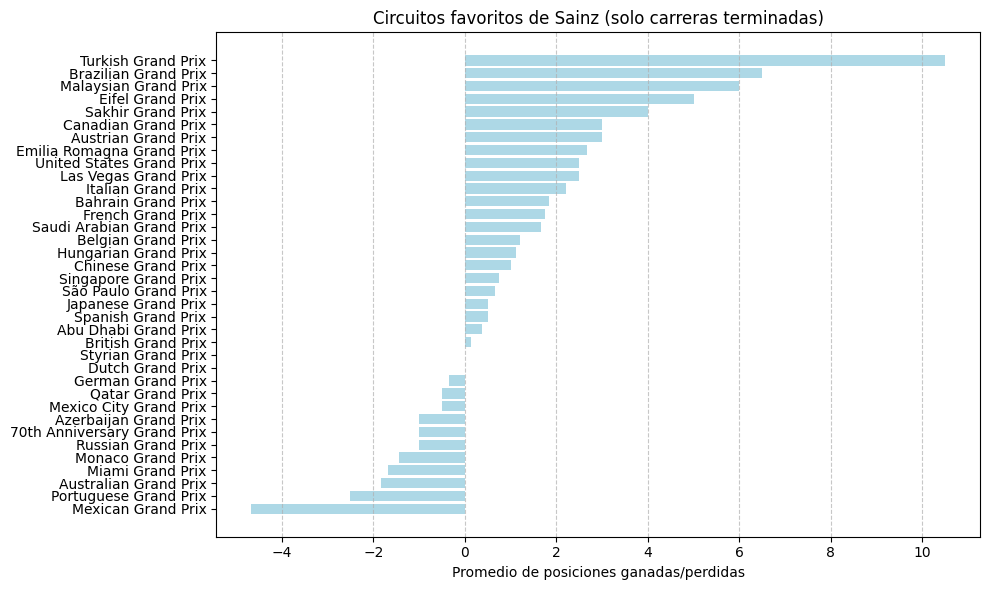

,name,diferencia_posiciones
34,Turkish Grand Prix,10.500000
7,Brazilian Grand Prix,6.500000
20,Malaysian Grand Prix,6.000000
12,Eifel Grand Prix,5.000000
28,Sakhir Grand Prix,4.000000
9,Canadian Grand Prix,3.000000
3,Austrian Grand Prix,3.000000
13,Emilia Romagna Grand Prix,2.666667
35,United States Grand Prix,2.500000
19,Las Vegas Grand Prix,2.500000


In [98]:
# Calculamos la media de diferencia de posiciones por circuito para Sainz (solo carreras terminadas)
media_circuito_sainz = df_sainz_terminadas.groupby('name')['diferencia_posiciones'].mean().reset_index()

# Ordenamos por la media (de mayor a menor)
media_circuito_sainz = media_circuito_sainz.sort_values(by='diferencia_posiciones', ascending=False)

# Gráfico de barras con los circuitos donde más mejora posiciones Sainz
plt.figure(figsize=(10, 6))
plt.barh(media_circuito_sainz['name'], media_circuito_sainz['diferencia_posiciones'], color='lightblue')
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Circuitos favoritos de Sainz (solo carreras terminadas)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

media_circuito_sainz


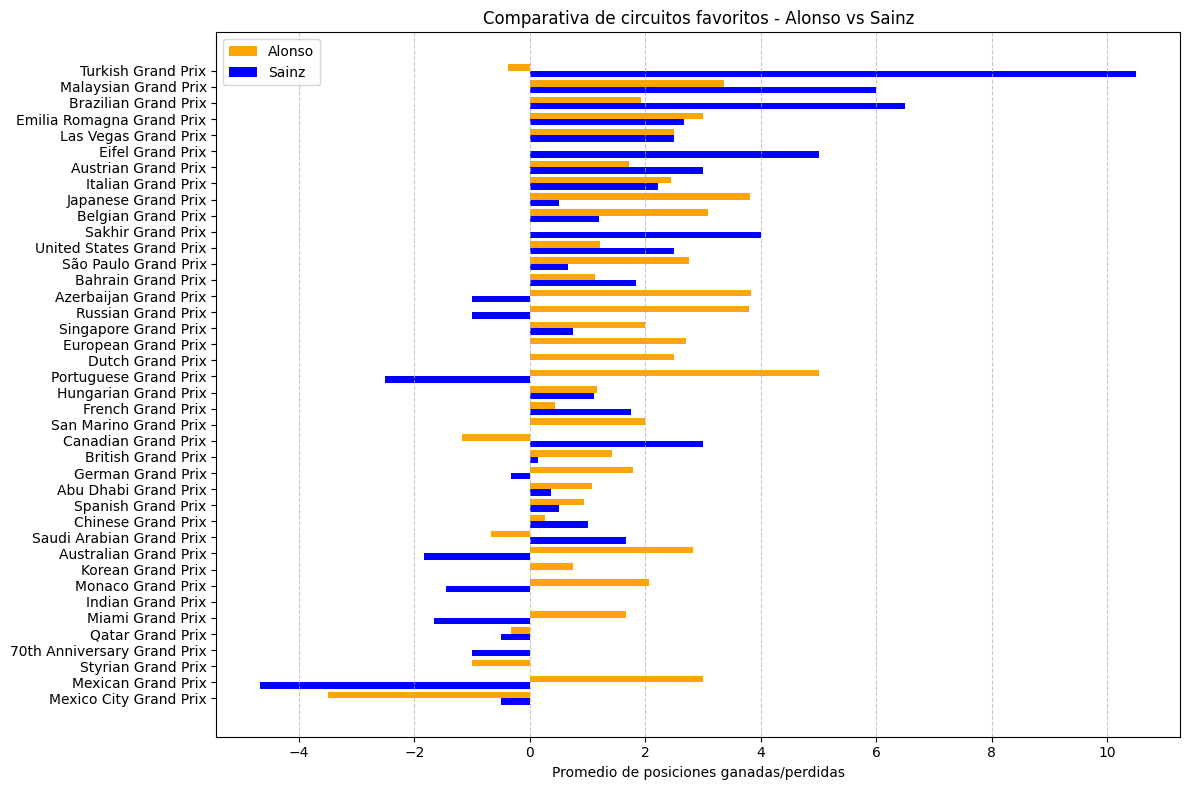

,name,Alonso,Sainz
38,Turkish Grand Prix,-0.375000,10.500000
23,Malaysian Grand Prix,3.357143,6.000000
7,Brazilian Grand Prix,1.933333,6.500000
13,Emilia Romagna Grand Prix,3.000000,2.666667
22,Las Vegas Grand Prix,2.500000,2.500000
12,Eifel Grand Prix,0.000000,5.000000
3,Austrian Grand Prix,1.714286,3.000000
19,Italian Grand Prix,2.437500,2.222222
20,Japanese Grand Prix,3.812500,0.500000
6,Belgian Grand Prix,3.083333,1.200000


In [99]:
# Combinamos los circuitos de Alonso y Sainz
# Primero, renombramos las columnas para que no se solapen al hacer merge
media_circuito_alonso_renamed = media_circuito_alonso.rename(columns={'diferencia_posiciones': 'Alonso'})
media_circuito_sainz_renamed = media_circuito_sainz.rename(columns={'diferencia_posiciones': 'Sainz'})

# Hacemos merge de ambos dataframes por el nombre del circuito
df_comparacion_circuitos = pd.merge(
    media_circuito_alonso_renamed[['name', 'Alonso']],
    media_circuito_sainz_renamed[['name', 'Sainz']],
    on='name',
    how='outer'  # Incluimos todos los circuitos de ambos pilotos
)

# Rellenamos los NaN con 0 para indicar que no hay datos en ese circuito para ese piloto
df_comparacion_circuitos = df_comparacion_circuitos.fillna(0)

# Ordenamos por la suma total de diferencia de posiciones para tener los circuitos "más activos" arriba
df_comparacion_circuitos['suma'] = df_comparacion_circuitos['Alonso'] + df_comparacion_circuitos['Sainz']
df_comparacion_circuitos = df_comparacion_circuitos.sort_values(by='suma', ascending=False)

# Gráfico comparativo: barras agrupadas
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = range(len(df_comparacion_circuitos))

plt.barh([i - bar_width/2 for i in index], df_comparacion_circuitos['Alonso'], height=bar_width, label='Alonso', color='orange')
plt.barh([i + bar_width/2 for i in index], df_comparacion_circuitos['Sainz'], height=bar_width, label='Sainz', color='blue')

plt.yticks(index, df_comparacion_circuitos['name'])
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Comparativa de circuitos favoritos - Alonso vs Sainz')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

df_comparacion_circuitos[['name', 'Alonso', 'Sainz']]


🎯 3️⃣ Comportamiento según el circuito  
Podemos ver si hay circuitos donde suele mejorar más posiciones.  
💡 Podríamos sacar un ranking de sus circuitos más favorables.  

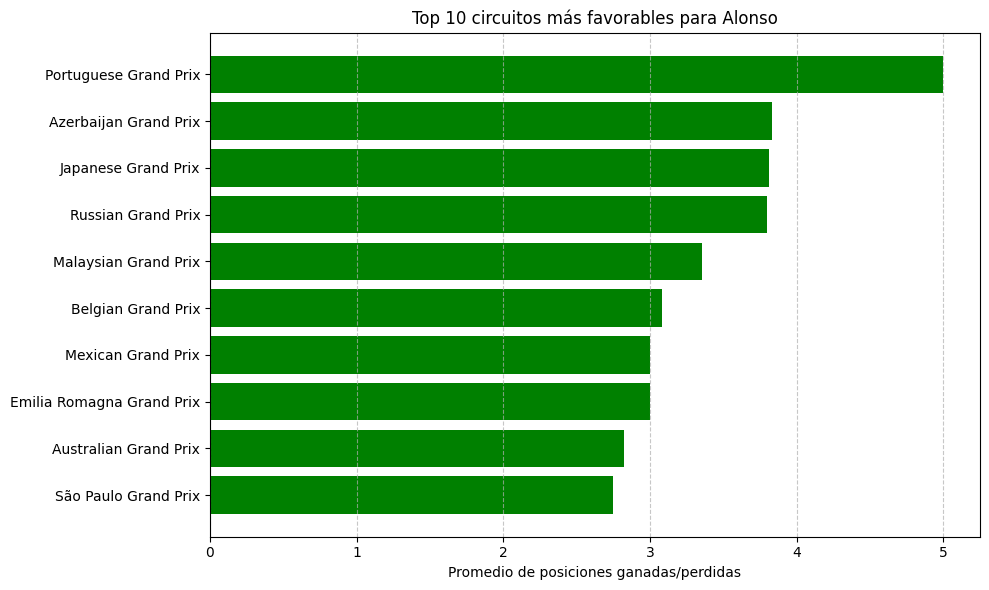

In [100]:
# Reordenamos usando el nombre correcto de la columna: 'diferencia_posiciones'
ranking_circuitos_alonso = media_circuito_alonso.sort_values(by='diferencia_posiciones', ascending=False).reset_index(drop=True)

# Creamos la gráfica de barras con los circuitos más favorables para Alonso
plt.figure(figsize=(10, 6))
plt.barh(ranking_circuitos_alonso['name'][:10], ranking_circuitos_alonso['diferencia_posiciones'][:10], color='green')
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Top 10 circuitos más favorables para Alonso')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


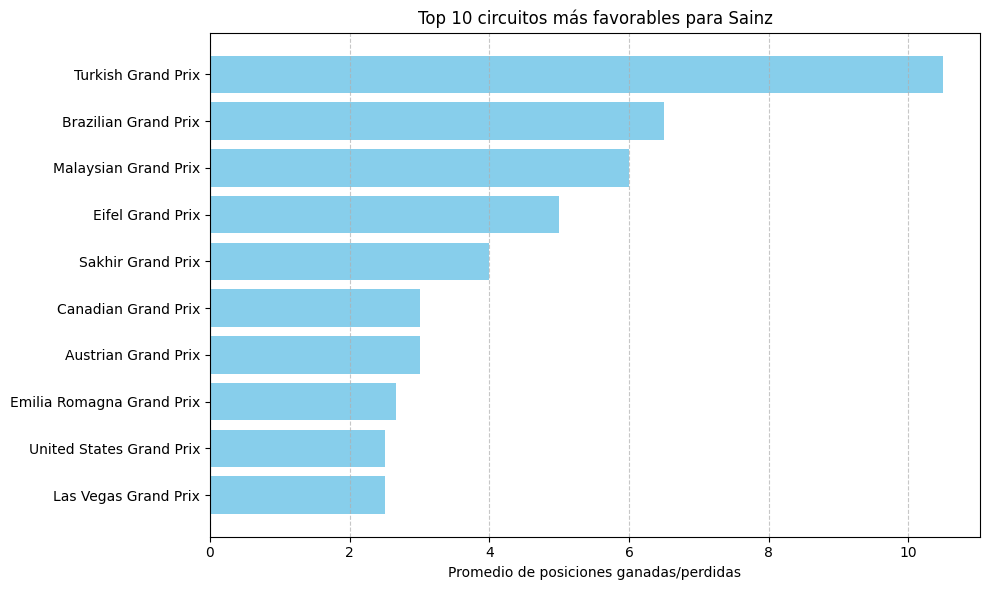

In [101]:
# Ordenamos por la media de posiciones ganadas (mayor a menor) para Sainz
ranking_circuitos_sainz = media_circuito_sainz.sort_values(by='diferencia_posiciones', ascending=False).reset_index(drop=True)

# Gráfico de barras con los circuitos más favorables para Sainz
plt.figure(figsize=(10, 6))
plt.barh(ranking_circuitos_sainz['name'][:10], ranking_circuitos_sainz['diferencia_posiciones'][:10], color='skyblue')
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Top 10 circuitos más favorables para Sainz')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



🎯 4️⃣ Comparación entre etapas  
Compararemos los primeros años de Alonso con los últimos para ver si su estilo ha cambiado (más agresivo, más conservador…).  
✅ Definimos dos etapas:
🔹 Primeros años:(2001-2010)
🔹 Últimos años: (2011-2024)

✅ Calculamos la media de posiciones ganadas/perdidas en cada etapa, teniendo en cuenta con que constructores formó parte

In [102]:
# Dividimos en dos etapas: 2001-2010 y 2011-2024 (solo carreras terminadas)
etapa_1 = df_alonso_terminadas[(df_alonso_terminadas['year'] >= 2001) & (df_alonso_terminadas['year'] <= 2010)]
etapa_2 = df_alonso_terminadas[(df_alonso_terminadas['year'] >= 2011) & (df_alonso_terminadas['year'] <= 2024)]

# Calculamos la media de posiciones ganadas/perdidas por etapa
media_etapa_1 = etapa_1['diferencia_posiciones'].mean()
media_etapa_2 = etapa_2['diferencia_posiciones'].mean()

# Sacamos también los constructores con los que compitió en cada etapa
constructores_etapa_1 = etapa_1['constructor_name'].unique()
constructores_etapa_2 = etapa_2['constructor_name'].unique()
#######################################################################################


#constructores_etapa_1 = etapa_1['diferencia_posiciones'].unique()
#constructores_etapa_2 = etapa_2['diferencia_posiciones'].unique()


# Preparamos gráfico comparativo
plt.figure(figsize=(10, 6))
bars = plt.bar(['2001-2010', '2011-2024'], [media_etapa_1, media_etapa_2], color=['orange', 'green'])
plt.ylabel('Promedio de posiciones ganadas/perdidas')
plt.title('Comparación de etapas - Alonso')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadimos los constructores como texto dentro de las barras y más abajo
etiqueta_etapa_1 = ', '.join(constructores_etapa_1)
etiqueta_etapa_2 = ', '.join(constructores_etapa_2)

# Ajustamos las posiciones de texto para que estén dentro de las barras (más abajo)
for i, etiqueta in enumerate([etiqueta_etapa_1, etiqueta_etapa_2]):
    plt.text(i, 0.05, f"Constructores:\n{etiqueta}", ha='center', va='bottom', fontsize=9, color='white')

plt.tight_layout()
plt.show()


KeyError: 'constructor_name'

🎯 5️⃣ Comparativa “constructor”  
Si quieres, podemos ver cómo cambia su rendimiento dependiendo del constructor con el que corría en cada época. 

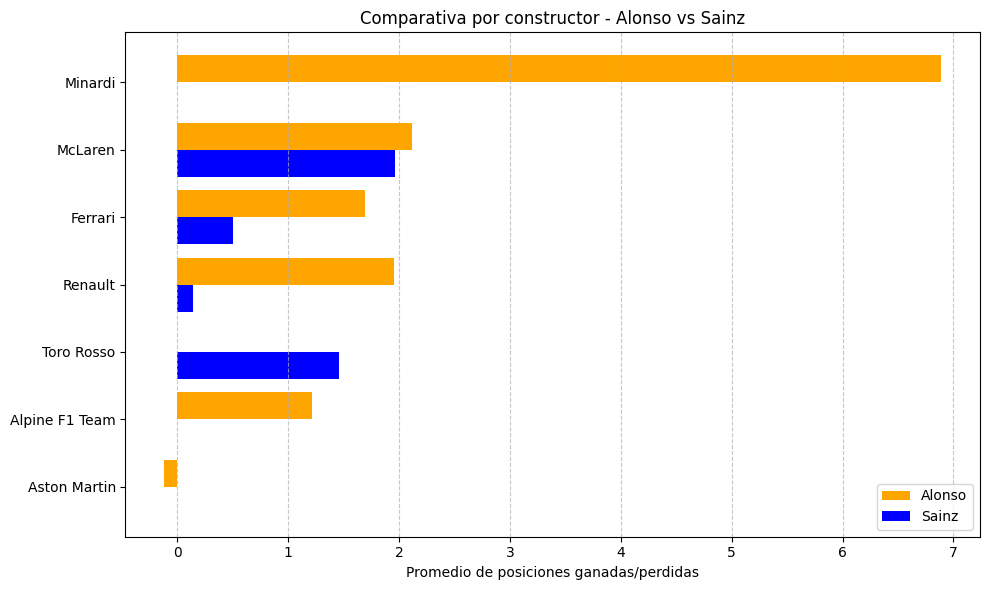

,constructor_name,Alonso,Sainz
4,Minardi,6.888889,0.000000
3,McLaren,2.114286,1.967742
2,Ferrari,1.696629,0.506329
5,Renault,1.953488,0.142857
6,Toro Rosso,0.000000,1.461538
0,Alpine F1 Team,1.216216,0.000000
1,Aston Martin,-0.116279,0.000000


In [ ]:
# Primero, reconstruimos df_alonso_terminadas incluyendo constructor_name  
df_alonso_terminadas = df_espanoles_mas_5_carreras[
    (df_espanoles_mas_5_carreras['driverId'] == 4) &
    (~df_espanoles_mas_5_carreras['position'].isna())
][['driverId', 'surname', 'raceId', 'name', 'year', 'grid', 'position', 'constructor_name']]

df_alonso_terminadas['diferencia_posiciones'] = df_alonso_terminadas['grid'] - df_alonso_terminadas['position']

# Hacemos lo mismo para Sainz
df_sainz_terminadas = df_espanoles_mas_5_carreras[
    (df_espanoles_mas_5_carreras['driverId'] == driver_id_sainz) &
    (~df_espanoles_mas_5_carreras['position'].isna())
][['driverId', 'surname', 'raceId', 'name', 'year', 'grid', 'position', 'constructor_name']]

df_sainz_terminadas['diferencia_posiciones'] = df_sainz_terminadas['grid'] - df_sainz_terminadas['position']

# Ahora recalculamos la media de diferencia de posiciones por constructor para Alonso
media_constructor_alonso = df_alonso_terminadas.groupby('constructor_name')['diferencia_posiciones'].mean().reset_index()
media_constructor_alonso = media_constructor_alonso.rename(columns={'diferencia_posiciones': 'Alonso'})

# Recalculamos para Sainz
media_constructor_sainz = df_sainz_terminadas.groupby('constructor_name')['diferencia_posiciones'].mean().reset_index()
media_constructor_sainz = media_constructor_sainz.rename(columns={'diferencia_posiciones': 'Sainz'})

# Combinamos ambos dataframes por constructor
df_comparacion_constructores = pd.merge(
    media_constructor_alonso[['constructor_name', 'Alonso']],
    media_constructor_sainz[['constructor_name', 'Sainz']],
    on='constructor_name',
    how='outer'
).fillna(0)

# Ordenamos por la suma total para ver los más destacados arriba
df_comparacion_constructores['suma'] = df_comparacion_constructores['Alonso'] + df_comparacion_constructores['Sainz']
df_comparacion_constructores = df_comparacion_constructores.sort_values(by='suma', ascending=False)

# Gráfico comparativo: barras agrupadas
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(df_comparacion_constructores))

plt.barh([i - bar_width/2 for i in index], df_comparacion_constructores['Alonso'], height=bar_width, label='Alonso', color='orange')
plt.barh([i + bar_width/2 for i in index], df_comparacion_constructores['Sainz'], height=bar_width, label='Sainz', color='blue')

plt.yticks(index, df_comparacion_constructores['constructor_name'])
plt.xlabel('Promedio de posiciones ganadas/perdidas')
plt.title('Comparativa por constructor - Alonso vs Sainz')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

df_comparacion_constructores[['constructor_name', 'Alonso', 'Sainz']]


Vamos a crear un dataframe parecido al de df_espanoles_mas_5_carreras que se llame df_pilotos y sirva para cualquier piloto, no solo españoles   
El dataframe df_pilotos es como el que creamos antes para los españoles   (df_espanoles_mas_5_carreras), pero a nivel global para todos los pilotos.  

Contiene:  
🔸 driverId  
🔸 surname  
🔸 nacionalidad  
🔸 num_carreras  
🔸 total_puntos  
🔸 puntos_promedio  
🔸 constructores  

💡 Con él podemos filtrar por nacionalidad (como hicimos con los españoles) o extraer datos específicos de pilotos concretos.  

In [105]:
# Reconstruimos el dataframe general, pero ahora para TODOS los pilotos (no solo españoles)

# Paso 1: drivers - información general del piloto
drivers_df = drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality']]

# Paso 2: results - datos finales de la carrera
results_df = results[['driverId', 'raceId', 'constructorId', 'grid', 'position', 'points', 'statusId']]

# Paso 3: qualifying - posición de clasificación
qualifying = pd.read_csv('../Datos/Datos_csv/qualifying.csv')
qualifying_df = qualifying[['driverId', 'raceId', 'position']].rename(columns={'position': 'qualifying_position'})

# Paso 4: races - información de la carrera
races_df = races[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]

# Paso 5: circuits - ubicación y país del circuito
circuits = pd.read_csv('../Datos/Datos_csv/circuits.csv')
circuits_df = circuits[['circuitId', 'name', 'location', 'country']].rename(columns={'name': 'circuit_name'})

# Paso 6: constructors - información del constructor
constructors_df = constructors[['constructorId', 'name', 'nationality']].rename(columns={'name': 'constructor_name', 'nationality': 'constructor_nationality'})

# Paso 7: años en los que cada constructor participó
constructor_standings = pd.read_csv('../Datos/Datos_csv/constructor_standings.csv')
years_constructor = constructor_standings[['constructorId', 'raceId']].merge(races[['raceId', 'year']], on='raceId', how='left')
years_by_constructor = years_constructor.groupby('constructorId')['year'].unique().reset_index().rename(columns={'year': 'years_competed'})

# Paso 8: status - descripción del resultado final
status = pd.read_csv('../Datos/Datos_csv/status.csv')
status_df = status[['statusId', 'status']]

# Ahora realizamos los merges progresivos
df_pilotos = drivers_df.merge(results_df, on='driverId', how='left')
df_pilotos = df_pilotos.merge(qualifying_df, on=['driverId', 'raceId'], how='left')
df_pilotos = df_pilotos.merge(races_df, on='raceId', how='left')
df_pilotos = df_pilotos.merge(circuits_df, on='circuitId', how='left')
df_pilotos = df_pilotos.merge(constructors_df, on='constructorId', how='left')
df_pilotos = df_pilotos.merge(years_by_constructor, on='constructorId', how='left')
df_pilotos = df_pilotos.merge(status_df, on='statusId', how='left')
df_pilotos_completo=df_pilotos
df_pilotos.info()

#df_pilotos.to_csv('/mnt/data/df_pilotos_completo.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driverId                 26759 non-null  int64  
 1   driverRef                26759 non-null  object 
 2   forename                 26759 non-null  object 
 3   surname                  26759 non-null  object 
 4   nationality              26759 non-null  object 
 5   raceId                   26759 non-null  int64  
 6   constructorId            26759 non-null  int64  
 7   grid                     26759 non-null  int64  
 8   position                 26759 non-null  object 
 9   points                   26759 non-null  float64
 10  statusId                 26759 non-null  int64  
 11  qualifying_position      10494 non-null  float64
 12  year                     26759 non-null  int64  
 13  round                    26759 non-null  int64  
 14  circuitId             

🔍 ¿Qué hice para crear el dataset?

✅ 1. Calculé el total de puntos por nacionalidad en el dataframe df_pilotos_completo.
Esto nos dio la lista de las 10 nacionalidades más fuertes.

✅ 2. Para cada una de esas nacionalidades, seleccioné los 2 pilotos con más puntos totales (ordenados de mayor a menor).
Esto es lo que debería dar 20 pilotos (2 por nacionalidad).

In [ ]:

# Recalculamos carreras totales y puntos totales/promedio
carreras_por_piloto = results.groupby('driverId').size().reset_index(name='num_carreras')
puntos_por_piloto = results.groupby('driverId')['points'].agg(['sum', 'mean']).reset_index().rename(columns={'sum': 'total_puntos', 'mean': 'puntos_promedio'})

# Creamos el dataframe final con la info básica del piloto y los resultados agregados
df_pilotos_final = drivers[['driverId', 'surname', 'nationality']].merge(
    carreras_por_piloto, on='driverId', how='left').merge(
    puntos_por_piloto, on='driverId', how='left')

# Ahora seleccionamos los 2 mejores pilotos por nacionalidad (10 nacionalidades más fuertes)
puntos_por_nacionalidad = df_pilotos_final.groupby('nationality')['total_puntos'].sum().reset_index().sort_values(by='total_puntos', ascending=False)
nacionalidades_top10 = puntos_por_nacionalidad.head(10)['nationality'].tolist()

# Seleccionamos 2 pilotos por cada nacionalidad top
pilotos_destacados_final = pd.DataFrame()
for nacionalidad in nacionalidades_top10:
    top_pilotos = df_pilotos_final[df_pilotos_final['nationality'] == nacionalidad].sort_values(by='total_puntos', ascending=False).head(2)
    pilotos_destacados_final = pd.concat([pilotos_destacados_final, top_pilotos])

# Añadimos a Alonso explícitamente en caso de que no aparezca en el top
alonso_data = df_pilotos_final[df_pilotos_final['surname'] == 'Alonso']
pilotos_destacados_final = pd.concat([pilotos_destacados_final, alonso_data]).drop_duplicates(subset=['driverId']).reset_index(drop=True)

pilotos_destacados_final

,driverId,surname,nationality,num_carreras,total_puntos,puntos_promedio
0,1,Hamilton,British,356,4820.5,13.540730
1,18,Button,British,309,1235.0,3.996764
2,20,Vettel,German,300,3098.0,10.326667
3,3,Rosberg,German,206,1594.5,7.740291
4,8,Räikkönen,Finnish,352,1873.0,5.321023
5,822,Bottas,Finnish,247,1788.0,7.238866
6,117,Prost,French,202,798.5,3.952970
7,839,Ocon,French,156,440.0,2.820513
8,4,Alonso,Spanish,404,2329.0,5.764851
9,832,Sainz,Spanish,208,1203.5,5.786058


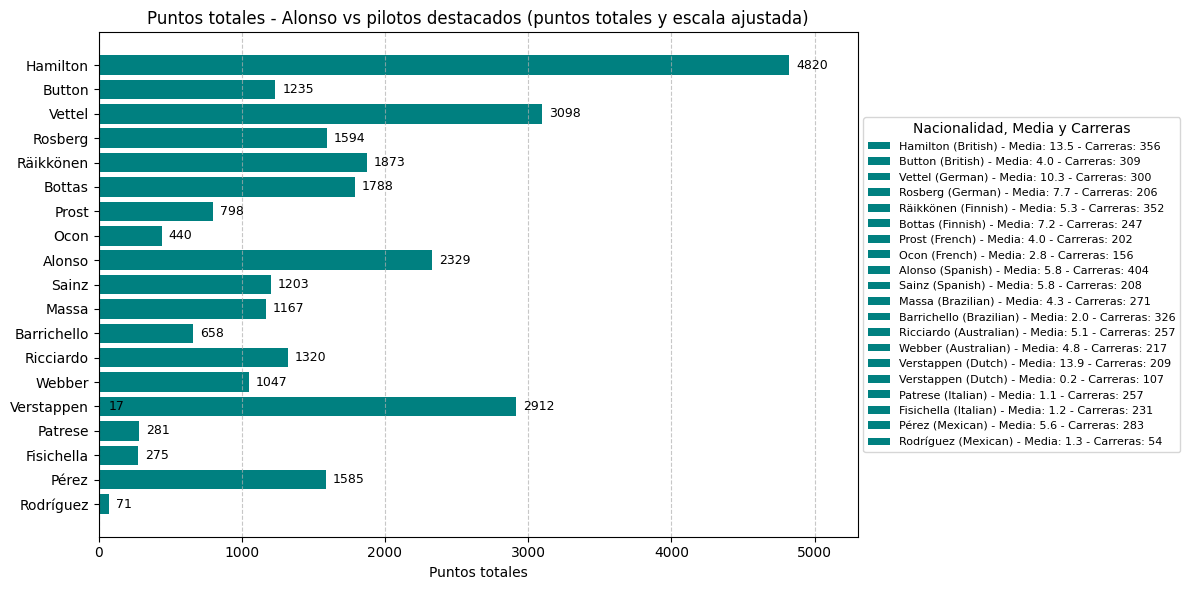

In [ ]:
# Gráfico con la leyenda incluyendo la media de puntos por carrera y el número de carreras

# Ajustamos la escala para que se vea mejor y añadimos los puntos totales al final de cada barra

plt.figure(figsize=(12, 6))
bars = plt.barh(pilotos_destacados_final['surname'], pilotos_destacados_final['total_puntos'], color='teal')
plt.xlabel('Puntos totales')
plt.title('Puntos totales - Alonso vs pilotos destacados (puntos totales y escala ajustada)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadimos los puntos totales como texto al final de cada barra (ajustamos para que no sobresalga mucho)
for bar, puntos in zip(bars, pilotos_destacados_final['total_puntos']):
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f"{int(puntos)}", va='center', fontsize=9, color='black')

# Ajustamos la escala de los ejes para que las barras no sean demasiado largas visualmente
plt.xlim(0, pilotos_destacados_final['total_puntos'].max() * 1.1)

# Leyenda con más información (ya estaba bien)
legend_labels = [f"{surname} ({nat}) - Media: {prom:.1f} - Carreras: {carreras}" 
                  for surname, nat, prom, carreras in zip(pilotos_destacados_final['surname'], 
                                                           pilotos_destacados_final['nationality'], 
                                                           pilotos_destacados_final['puntos_promedio'], 
                                                           pilotos_destacados_final['num_carreras'])]
plt.legend(bars, legend_labels, title='Nacionalidad, Media y Carreras', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.tight_layout()
plt.show()


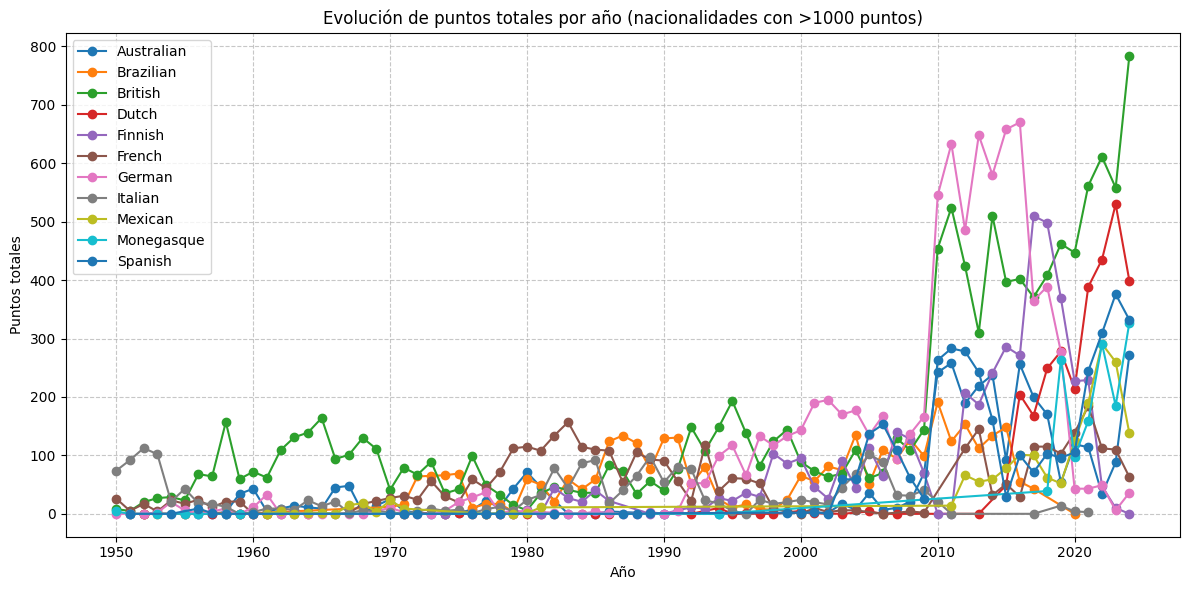

In [ ]:
# Calculamos puntos totales por nacionalidad (sumando todos los años)
# Partimos de pilotos_destacados_final (con toda la info de cada carrera, piloto, nacionalidad, año y puntos)


# Aseguramos que los puntos son numéricos
df_pilotos['points'] = pd.to_numeric(df_pilotos['points'], errors='coerce')

# Calculamos los puntos totales por año y nacionalidad
puntos_por_anyo_nacionalidad = df_pilotos.groupby(['year', 'nationality'])['points'].sum().reset_index()

# Calculamos puntos totales por nacionalidad
puntos_totales_nacionalidad = puntos_por_anyo_nacionalidad.groupby('nationality')['points'].sum().reset_index()

# Filtramos nacionalidades con más de 1000 puntos
nacionalidades_fuertes = puntos_totales_nacionalidad[puntos_totales_nacionalidad['points'] >= 1000]['nationality'].tolist()

# Filtramos el dataframe con estas nacionalidades
puntos_por_anyo_nacionalidad_filtrado = puntos_por_anyo_nacionalidad[puntos_por_anyo_nacionalidad['nationality'].isin(nacionalidades_fuertes)]

# Gráfica final
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for nacionalidad in nacionalidades_fuertes:
    data_nac = puntos_por_anyo_nacionalidad_filtrado[puntos_por_anyo_nacionalidad_filtrado['nationality'] == nacionalidad]
    plt.plot(data_nac['year'], data_nac['points'], marker='o', label=nacionalidad)

plt.xlabel('Año')
plt.ylabel('Puntos totales')
plt.title('Evolución de puntos totales por año (nacionalidades con >1000 puntos)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()





In [109]:
# 4️⃣ Filtramos solo datos desde 1990
df_moderna = df_pilotos_completo[df_pilotos_completo['year'] >= 1990]

# 5️⃣ Calculamos años únicos activos por piloto
años_activos = df_moderna.groupby('surname')['year'].nunique().reset_index().rename(columns={'year': 'años_actividad'})

# 6️⃣ Calculamos puntos totales y promedio por carrera por piloto
puntos_stats = df_moderna.groupby('surname')['points'].agg(['sum', 'mean']).reset_index().rename(columns={'sum': 'puntos_totales', 'mean': 'puntos_promedio'})

# 7️⃣ Combinamos en un solo dataframe
df_longevidad = años_activos.merge(puntos_stats, on='surname', how='left').sort_values(by='años_actividad', ascending=False).reset_index(drop=True)

df_longevidad

,surname,años_actividad,puntos_totales,puntos_promedio
0,Schumacher,22,1907.0,3.584586
1,Alonso,21,2329.0,5.764851
2,Räikkönen,19,1873.0,5.321023
3,Barrichello,19,658.0,2.018405
4,Verstappen,18,2929.5,9.270570
...,...,...,...,...
195,Tuero,1,0.0,0.000000
196,Wilson,1,1.0,0.062500
197,Winkelhock,1,0.0,0.000000
198,di Grassi,1,0.0,0.000000


In [121]:

df_moderna = df_pilotos_completo[df_pilotos_completo['year'] >= 1990]
años_activos = df_moderna.groupby('surname')['year'].nunique().reset_index().rename(columns={'year': 'años_actividad'})
puntos_stats = df_moderna.groupby('surname')['points'].agg(['sum', 'mean']).reset_index().rename(columns={'sum': 'puntos_totales', 'mean': 'puntos_promedio'})

# Combinamos y filtramos
df_longevidad = años_activos.merge(puntos_stats, on='surname', how='left')
df_longevidad_filtrado = df_longevidad[(df_longevidad['años_actividad'] >= 1) & (df_longevidad['puntos_totales'] >= 100)].sort_values(by='años_actividad', ascending=False).reset_index(drop=True)

df_longevidad_filtrado.to_csv('../Datos/Datos_csv_creados/_df_longevidad_filtrado.csv', index=True)


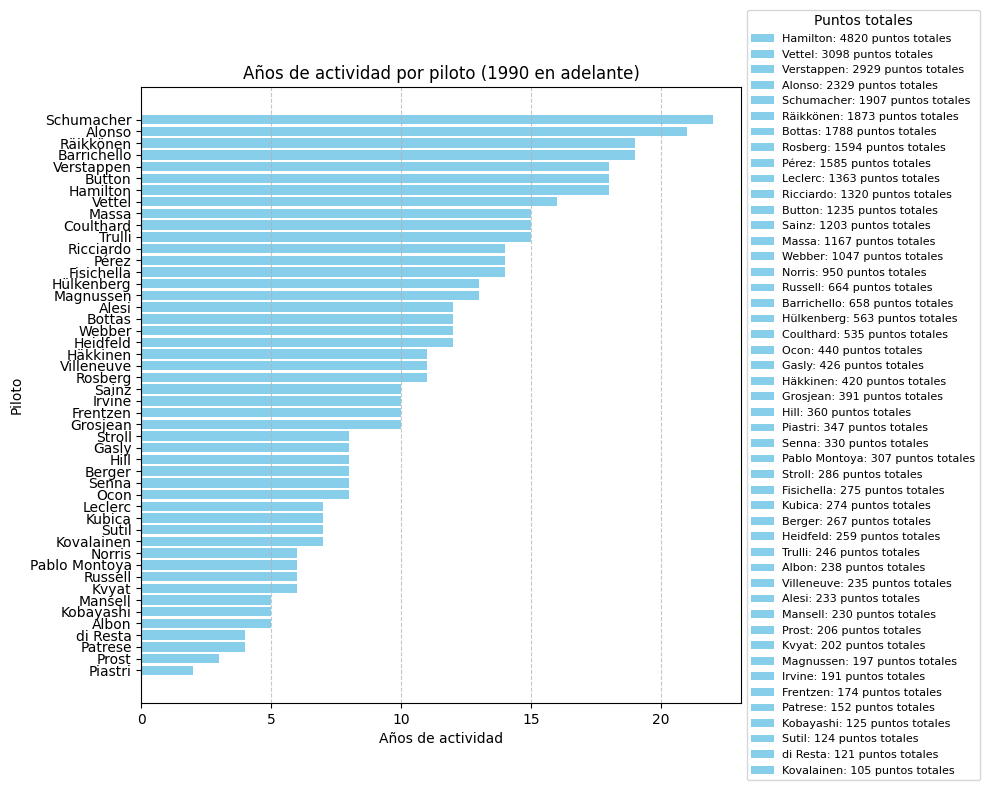

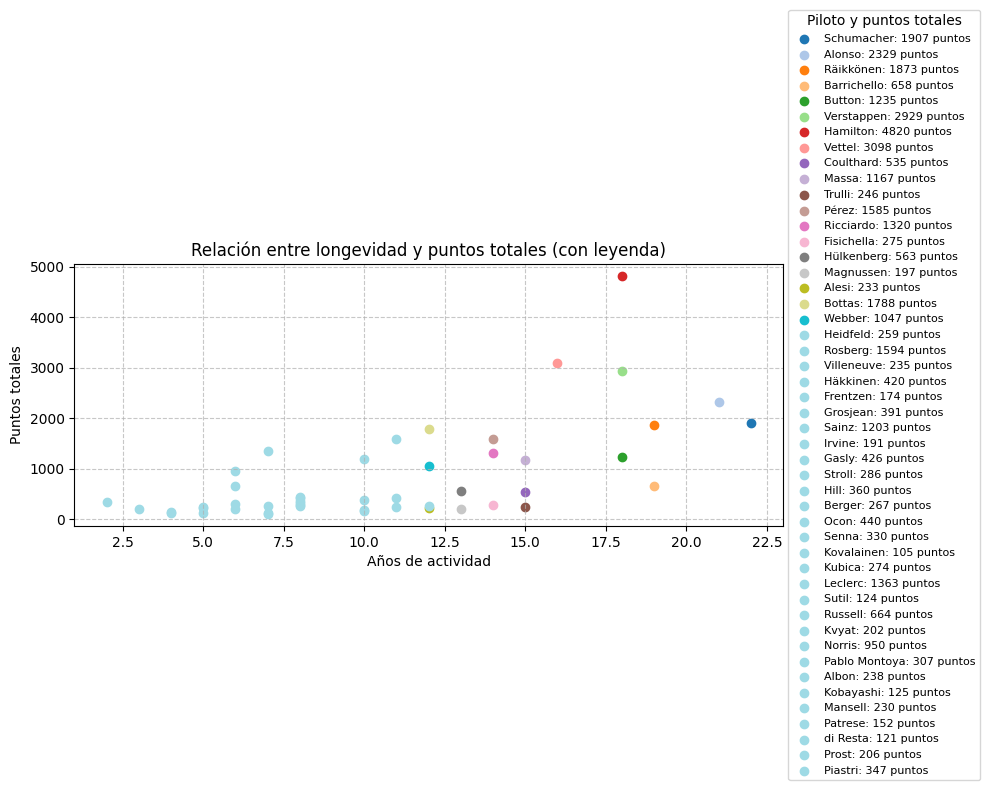

In [118]:
# Creamos un scatterplot con colores únicos para cada piloto y leyenda con puntos totales

plt.figure(figsize=(10, 6))

# Generamos colores únicos para cada piloto
colors = plt.cm.tab20(range(len(df_longevidad_filtrado)))

# Scatterplot con cada piloto en color distinto
for i, row in df_longevidad_filtrado.iterrows():
    plt.scatter(row['años_actividad'], row['puntos_totales'], color=colors[i], label=f"{row['surname']}: {int(row['puntos_totales'])} puntos")

plt.xlabel('Años de actividad')
plt.ylabel('Puntos totales')
plt.title('Relación entre longevidad y puntos totales (con leyenda)')
plt.grid(True, linestyle='--', alpha=0.7)

# Leyenda externa con puntos totales
plt.legend(title='Piloto y puntos totales', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\Ira\AppData\Local\Temp\ipykernel_2912\875592290.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_plot['surname'], rotation=45, ha='right')


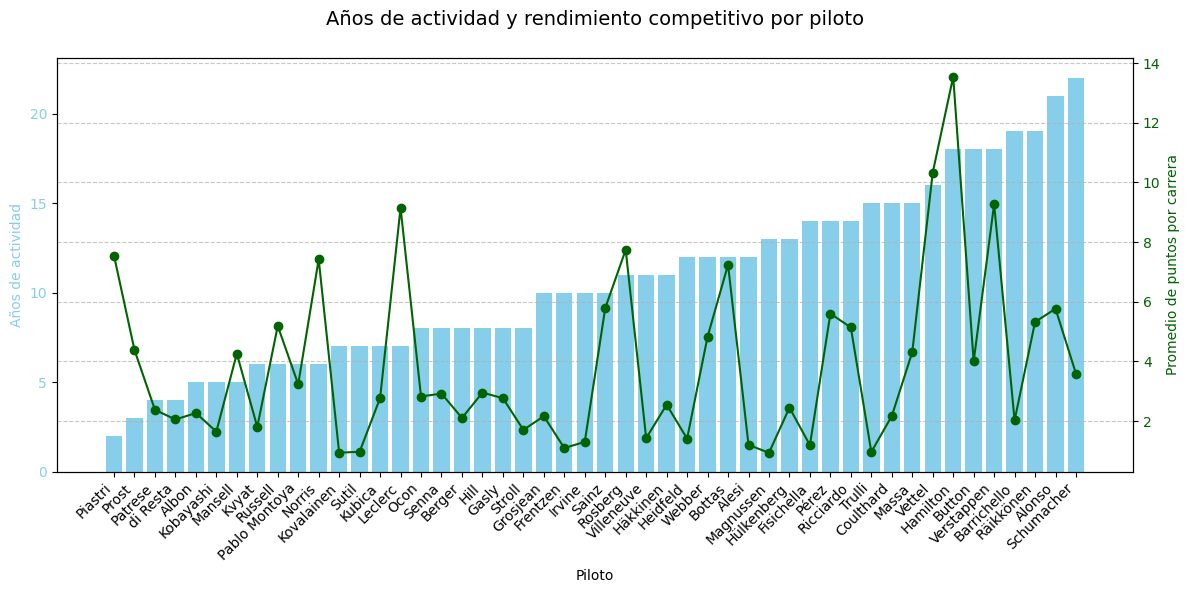

In [119]:
# 3️⃣ Gráfico combinado de barras (años de actividad) y línea (puntos promedio)

# Ordenamos por años de actividad para la visualización combinada
df_plot = df_longevidad_filtrado.sort_values(by='años_actividad', ascending=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para los años de actividad
ax1.bar(df_plot['surname'], df_plot['años_actividad'], color='skyblue', label='Años de actividad')
ax1.set_ylabel('Años de actividad', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Piloto')
ax1.set_xticklabels(df_plot['surname'], rotation=45, ha='right')

# Línea para el promedio de puntos por carrera
ax2 = ax1.twinx()
ax2.plot(df_plot['surname'], df_plot['puntos_promedio'], color='darkgreen', marker='o', label='Promedio de puntos')
ax2.set_ylabel('Promedio de puntos por carrera', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Título y leyenda combinada
fig.suptitle('Años de actividad y rendimiento competitivo por piloto', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.9)  # Ajuste para título superior

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
